# Fatal Police Shooting in the US


**CONTEST :** *Fatal Police Shooting in the US*

The 2014 murder of Michael Brown in Ferguson, Missouri gave rise to an outcry that culminated in the Black Lives Matter movement and growing public interest in the trustworthiness and racism of the police force in the United States.

**Objective:**

the goal is to find out as much information as possible about the murders in America.
The research is not only aimed at the racial side. And you will understand why while reading the Notebook.

[Omicidio di Michael Brown, Wikipedia:](https://it.wikipedia.org/wiki/Omicidio_di_Michael_Brown)

[Black Lives Matter Wikipedia:](https://it.wikipedia.org/wiki/Black_Lives_Matter)

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [136]:
sns.set()

In [137]:
data1_path = "../USA_Police_indagation/V2/ShareRaceByCity.csv"
data2_race = pd.read_csv(data1_path)

In [138]:
data2_path = "../USA_Police_indagation/V2/fatal-police-shootings-data.csv"
data2 = pd.read_csv(data2_path)

In [139]:
data2_agency_path = "../USA_Police_indagation/V2/fatal-police-shootings-agencies.csv"
data2_agency = pd.read_csv(data2_agency_path)

In [140]:
data2.shape, data2_agency.shape, data2_race.shape

((8432, 19), (3232, 6), (29268, 7))

In [141]:
data2.head(3)

id        date threat_type flee_status armed_with     city      county  \
0   3  2015-01-02       point         not        gun  Shelton       Mason   
1   4  2015-01-02       point         not        gun    Aloha  Washington   
2   5  2015-01-03        move         not    unarmed  Wichita    Sedgwick   

  state   latitude   longitude location_precision                name   age  \
0    WA  47.246826 -123.121592      not_available          Tim Elliot  53.0   
1    OR  45.487421 -122.891696      not_available    Lewis Lee Lembke  47.0   
2    KS  37.694766  -97.280554      not_available  John Paul Quintero  23.0   

  gender race    race_source  was_mental_illness_related  body_camera  \
0   male    A  not_available                        True        False   
1   male    W  not_available                       False        False   
2   male    H  not_available                       False        False   

  agency_ids  
0         73  
1         70  
2        238

In [142]:
data2_race.head(3)

Geographic area             City share_white share_black  \
0              AL       Abanda CDP        67.2        30.2   
1              AL   Abbeville city        54.4        41.4   
2              AL  Adamsville city        52.3        44.9   

  share_native_american share_asian share_hispanic  
0                     0           0            1.6  
1                   0.1           1            3.1  
2                   0.5         0.3            2.3

In [143]:
data2_agency.head(3)

id                               name          type state oricodes  \
0  3145  Abbeville County Sheriff's Office       sheriff    SC  SC00100   
1  2576         Aberdeen Police Department  local_police    WA  WA01401   
2  2114          Abilene Police Department  local_police    TX  TX22101   

   total_shootings  
0                1  
1                1  
2                3

**Usefull Functions**

In [144]:
def show_all_columns(df, rows):
    pd.set_option('display.max_columns', None)
    return df.head()[:rows]

In [145]:
def take_year(x):
    return str(x)[:4]


def take_month(x):
    return str(x)[5:7]

In [146]:
def split_ids(row):
    ids = str(row['agency_ids']).split(';')
    n = len(ids)
    new_rows = []
    for i in range(n):
        new_row = row.copy()
        new_row['agency_ids'] = ids[i]
        new_rows.append(new_row)
    return pd.DataFrame(new_rows)

## Data Preprocessing

In [147]:
new_dfs = []
for index, row in data2.iterrows():
    new_df = split_ids(row)
    new_dfs.append(new_df)
new_df = pd.concat(new_dfs, ignore_index=True)

In [148]:
data2_agency['id'] = data2_agency['id'].astype('int32')
new_df['agency_ids'] = new_df['agency_ids'].astype('int32')

merged_df = new_df.merge(data2_agency, left_on='agency_ids', right_on='id')

In [149]:
list_to_drop = ["id_y","state_y"]
merged_df.drop(list_to_drop, axis=1, inplace=True)

In [150]:
merged_df = merged_df.rename(columns={'state_x': 'state',
                                      'name_x': 'criminal_name',
                                      'name_y': 'department_name'})


merged_df.drop('oricodes', axis=1, inplace=True)

In [151]:
show_all_columns(merged_df, 3)

id_x        date threat_type flee_status armed_with       city county  \
0     3  2015-01-02       point         not        gun    Shelton  Mason   
1   758  2015-08-21       point         not        gun  Grapeview  Mason   
2  5685  2020-03-24      attack         car    vehicle    Shelton    NaN   

  state   latitude   longitude location_precision    criminal_name   age  \
0    WA  47.246826 -123.121592      not_available       Tim Elliot  53.0   
1    WA  47.286345 -122.924468      not_available    Timmy Walling  57.0   
2    WA  47.333423 -122.958007      not_available  Kathryn R. Hale  32.0   

   gender race    race_source  was_mental_illness_related  body_camera  \
0    male    A  not_available                        True        False   
1    male    W  not_available                        True        False   
2  female    W  not_available                       False        False   

   agency_ids                department_name     type  total_shootings  
0          73  Mason County Sheriff's Office  sheriff                3  
1          73  Mason County Sheriff's Office  sheriff                3  
2          73  Mason County Sheriff's Office  sheriff                3

In [152]:
# I'll need this list later for some plots
armed_drop_list = ['other','gun;knife','vehicle;gun','gun;vehicle','blunt_object;blunt_object','knife;vehicle']

In [153]:
# I add two parameters at data2 and merged_df
data2['year'] = data2.date.apply(take_year).astype(np.int32)
data2['month'] = data2.date.apply(take_month).astype(np.int32)

merged_df['year'] = merged_df.date.apply(take_year).astype(np.int32)
merged_df['month'] = merged_df.date.apply(take_month).astype(np.int32)

In [154]:
# I reformat some parameters to allow me to work with them better
data2['race_source'].replace('not_available', 'undetermined', inplace=True)
data2['race_source'].fillna('undetermined', inplace=True)
data2['flee_status'].fillna('unknown', inplace=True)
data2['armed_with'].fillna('unknown', inplace=True)
data2['county'].fillna('unknown', inplace=True)


# I reformat some parameters to allow me to work with them better
merged_df['race_source'].replace('not_available', 'undetermined', inplace=True)
merged_df['race_source'].fillna('undetermined', inplace=True)
merged_df['flee_status'].fillna('unknown', inplace=True)
merged_df['armed_with'].fillna('unknown', inplace=True)
merged_df['county'].fillna('unknown', inplace=True)

In [155]:
# I change the datatype of the data2_race dataframe to float to be able to work with it better
data2_race['share_white'] = data2_race['share_white'].replace('(X)', np.nan)
data2_race.share_white = data2_race.share_white.astype(np.float32)

data2_race['share_black'] = data2_race['share_black'].replace('(X)', np.nan)
data2_race.share_black = data2_race.share_black.astype(np.float32)

data2_race['share_native_american'] = data2_race['share_native_american'].replace('(X)', np.nan)
data2_race.share_native_american = data2_race.share_native_american.astype(np.float32)

data2_race['share_asian'] = data2_race['share_asian'].replace('(X)', np.nan)
data2_race.share_asian = data2_race.share_asian.astype(np.float32)

data2_race['share_hispanic'] = data2_race['share_hispanic'].replace('(X)', np.nan)
data2_race.share_hispanic = data2_race.share_hispanic.astype(np.float32)

**Recap:**

1) we have one dataframe called `data2` which reports information on places and criminals

2) we also have one dataframe called `data2_race`which shows the distribution of the breeds on the American territory

3) also one called `data2_agency` which reports information on the police forces involved

4) finally we have the `merged_df` which was created by merging the `data2` df and the `data2_agency` dataframe

**Achtung:** I will work on the `merged_df` dataframe at the bottom of the worksheet

## EDA

### police investigations

In [156]:
data2.head(3)

id        date threat_type flee_status armed_with     city      county  \
0   3  2015-01-02       point         not        gun  Shelton       Mason   
1   4  2015-01-02       point         not        gun    Aloha  Washington   
2   5  2015-01-03        move         not    unarmed  Wichita    Sedgwick   

  state   latitude   longitude location_precision                name   age  \
0    WA  47.246826 -123.121592      not_available          Tim Elliot  53.0   
1    OR  45.487421 -122.891696      not_available    Lewis Lee Lembke  47.0   
2    KS  37.694766  -97.280554      not_available  John Paul Quintero  23.0   

  gender race   race_source  was_mental_illness_related  body_camera  \
0   male    A  undetermined                        True        False   
1   male    W  undetermined                       False        False   
2   male    H  undetermined                       False        False   

  agency_ids  year  month  
0         73  2015      1  
1         70  2015      1  
2        238  2015      1

In [157]:
# here we can see the main weapons equipped by the criminals
data2.armed_with.value_counts()[:5]

gun             4873
knife           1428
unarmed          493
unknown          344
undetermined     318
Name: armed_with, dtype: int64

In [158]:
# definitely a dramatic increase in recent years
data2.year.value_counts()[:10]

2022    1096
2021    1048
2020    1019
2019     997
2015     995
2018     992
2017     983
2016     958
2023     344
Name: year, dtype: int64

In [159]:
# These are the states where unarmed criminals died most frequently
data2[data2.armed_with=='unarmed']['state'].value_counts().sort_values(ascending=False)[:5]

CA    91
TX    54
FL    34
AZ    26
GA    21
Name: state, dtype: int64

In [160]:
# These are the states where criminals equipped by Knife died most frequently
city_with_more_crime = data2[data2.armed_with=='knife']['state'].value_counts().sort_values(ascending=False)
data2[data2.armed_with=='knife']['state'].value_counts().sort_values(ascending=False)[:5]

CA    289
TX    107
FL     94
AZ     63
WA     57
Name: state, dtype: int64

In [161]:
# Part1
#follow in next line of code.
# Here i show the states wich more often use the "body camera"
states_with_camera = data2[data2.body_camera==True]['state'].value_counts()
states_with_camera.head(5)

CA    232
TX    108
FL     59
AZ     59
NV     44
Name: state, dtype: int64

In [162]:
# Part2
# This result plus the previous one could shows that from 2015
# some states are trying to adopt preventive measures with cameras
camera_years = data2[data2.body_camera==True]['year'].value_counts()
camera_years.head(5)

2021    216
2022    183
2020    175
2016    145
2019    137
Name: year, dtype: int64

In [163]:
# these are the main cities that used the cameras
city_adopt_camera = data2[data2.body_camera==True]['city'].value_counts()
city_adopt_camera[:5]

Las Vegas      30
Los Angeles    28
Houston        23
Phoenix        20
San Diego      18
Name: city, dtype: int64

In [164]:
# here I control the cities with the highest number of crimes that ended in the death of the criminal.
city_crime = city_with_more_crime[:17].to_list()
data2.city.value_counts()[:5]

Los Angeles    135
Phoenix        112
Houston         96
Las Vegas       72
San Antonio     71
Name: city, dtype: int64

In [165]:
# this shows us that cities that have more "criminal deaths" also have more "body cameras"
# or are trying to integrate it
corr = city_adopt_camera.corr(city_with_more_crime)
corr

nan

### gunshot deaths

In [166]:
# I save a database with only gunshot deaths
data_shoot = merged_df[merged_df.threat_type=='shoot']

In [167]:
data_shoot.shape

(2611, 24)

In [168]:
data_shoot.head(3)

id_x        date threat_type flee_status armed_with     city   county  \
9   2437  2017-03-18       shoot         not        gun  Wichita  unknown   
10  2500  2017-04-13       shoot         car        gun    Udall   Cowley   
14  5438  2019-05-23       shoot         not        gun  Wichita  unknown   

   state   latitude  longitude location_precision     criminal_name   age  \
9     KS  37.624300 -97.309132      not_available    Kevin C. Perry  25.0   
10    KS  37.320641 -97.150889      not_available  Charles Johnston  25.0   
14    KS  37.619914 -97.346228      not_available       Fred Burton  56.0   

   gender race   race_source  was_mental_illness_related  body_camera  \
9    male    W  undetermined                       False        False   
10   male    W  undetermined                       False        False   
14   male    W  undetermined                        True        False   

    agency_ids            department_name          type  total_shootings  \
9          238  Wichita Police Department  local_police               14   
10         238  Wichita Police Department  local_police               14   
14         238  Wichita Police Department  local_police               14   

    year  month  
9   2017      3  
10  2017      4  
14  2019      5

In [169]:
# first let's look at the number of races of criminals
data_shoot.race.value_counts()

W    1104
B     696
H     353
A      32
N      21
O       8
Name: race, dtype: int64

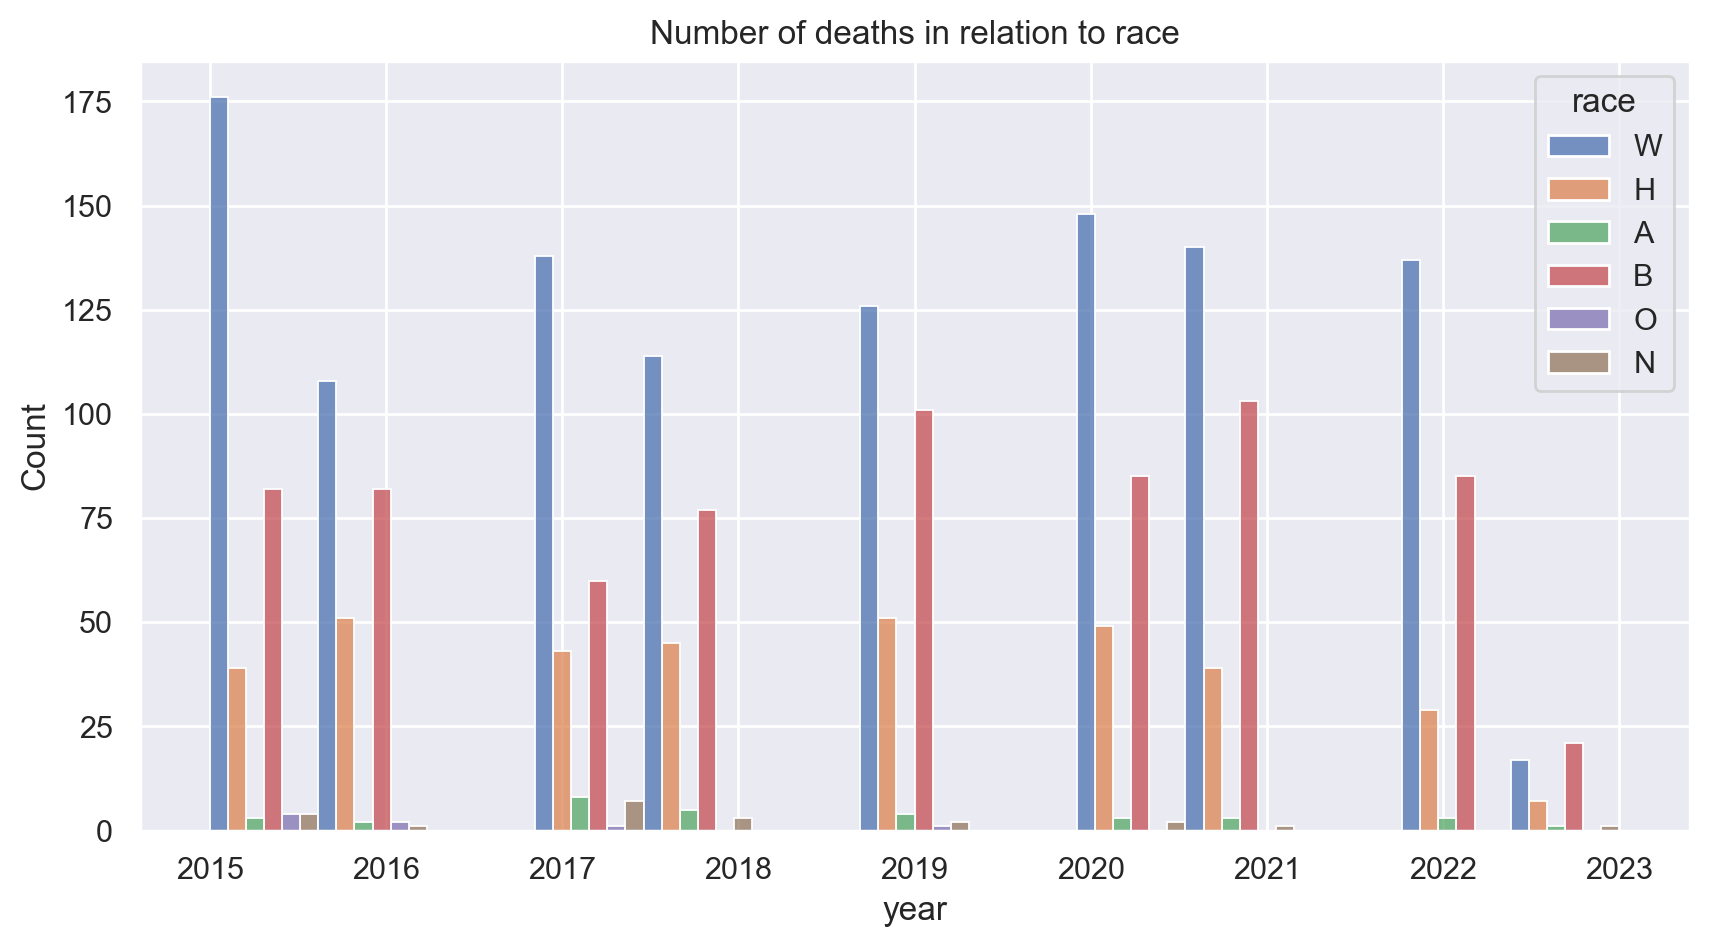

In [170]:
# Let's look at a graph sorted by year where you can see the race that was shote
plt.figure(figsize=(10,5), dpi=200)
sns.histplot(data=data_shoot, x='year', hue='race', multiple='dodge')
plt.title('Number of deaths in relation to race')
plt.show()

In [171]:
# I save a dataframe without the white criminals based on  "gunshot_death"
data_shoot_no_white = data_shoot.drop(data_shoot.loc[data_shoot['race'] == 'W'].index)

In [172]:
data_shoot_no_white.state.value_counts()[:5]

CA    180
TX    170
FL     85
GA     74
AZ     62
Name: state, dtype: int64

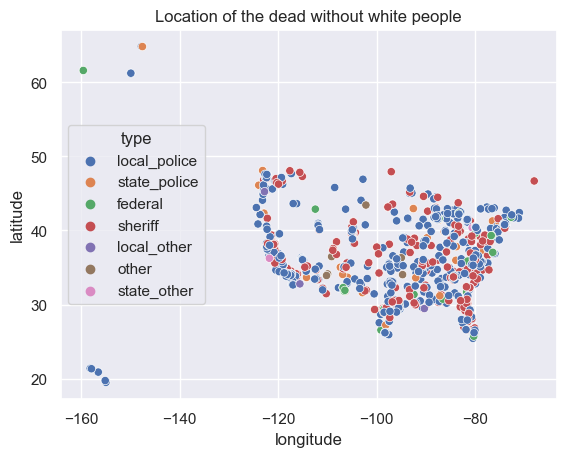

In [173]:
# you notice a clear collection of deaths of black people.
sns.scatterplot(data=data_shoot_no_white, x='longitude',y='latitude',hue='type')
plt.title('Location of the dead without white people')
plt.show()

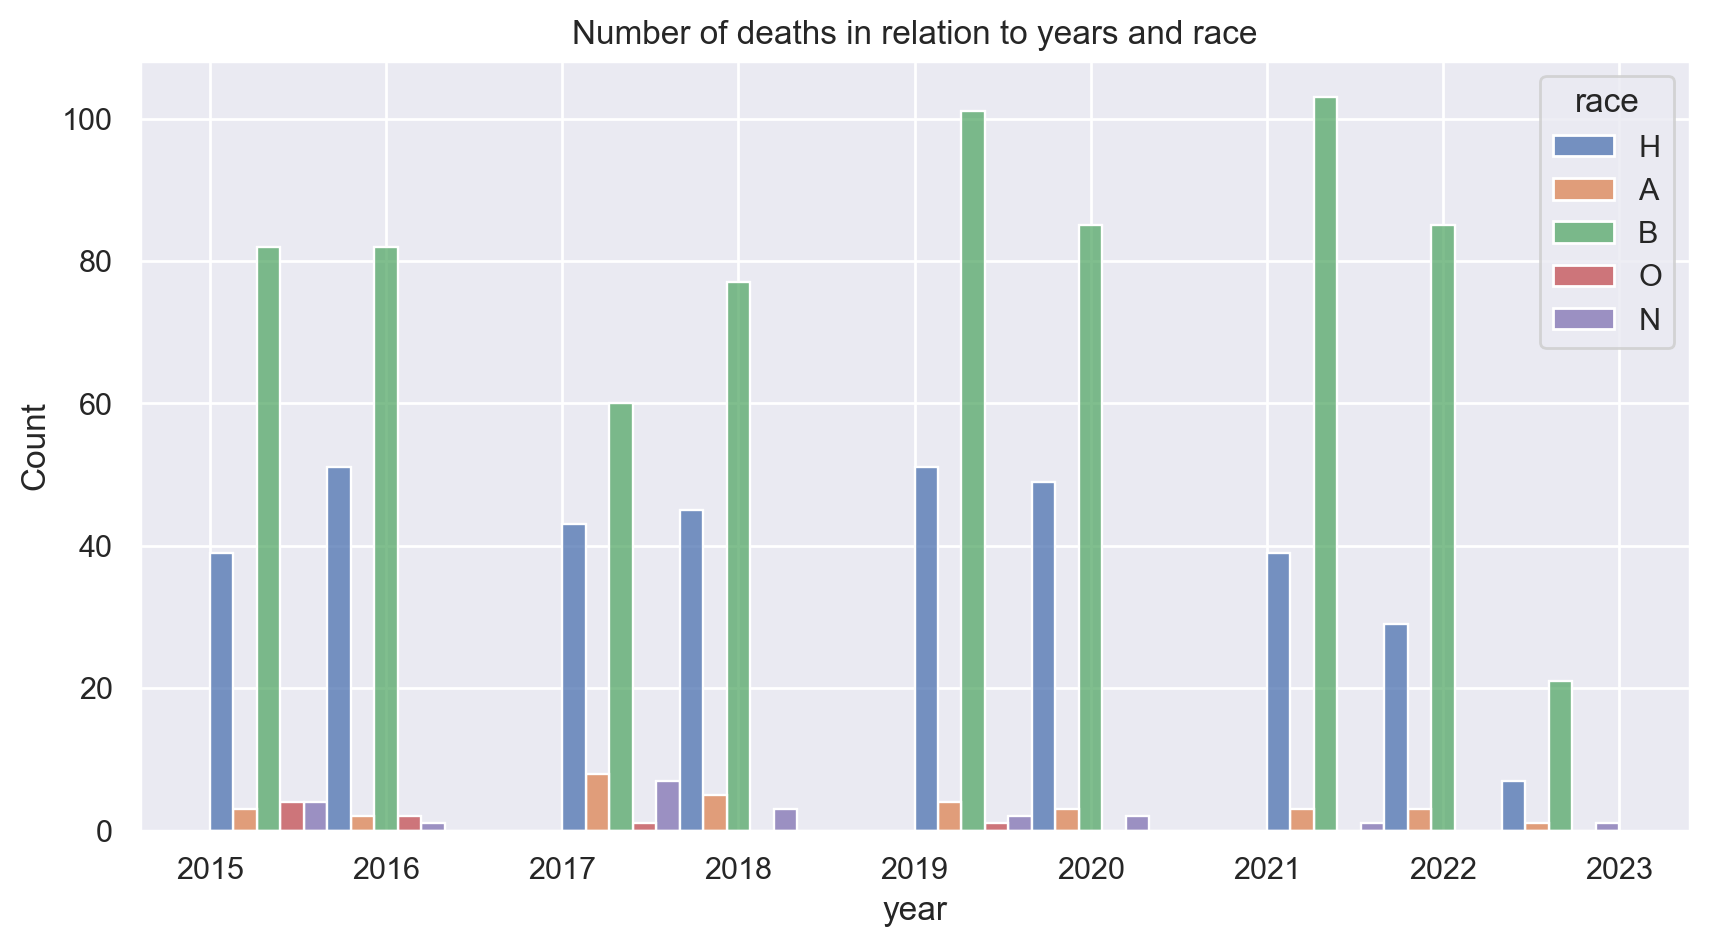

In [174]:
plt.figure(figsize=(10,5), dpi=200)
sns.histplot(data=data_shoot_no_white, x='year', hue='race', multiple='dodge')
plt.title('Number of deaths in relation to years and race')
plt.show()

### Race indagation, pt1

In [175]:
# let's take a closer look at the isolated result, save a DataFrame with only black people
black = merged_df[merged_df.race=='B']

In [176]:
black.head()

id_x        date threat_type flee_status armed_with           city  \
26  1052  2015-12-02      threat         not      knife  San Francisco   
28  1548  2016-05-19        flee         car    unarmed  San Francisco   
31  2975  2017-09-24      threat         not        gun  San Francisco   
32  3176  2017-12-01        flee         car    unarmed  San Francisco   
47  1201  2016-01-21       shoot         car        gun        Eufaula   

           county state   latitude   longitude location_precision  \
26  San Francisco    CA  37.720876 -122.397064      not_available   
28  San Francisco    CA  37.732359 -122.430949      not_available   
31  San Francisco    CA  37.796198 -122.412569      not_available   
32  San Francisco    CA  37.718758 -122.387701      not_available   
47       McIntosh    OK  35.287321  -95.582485      not_available   

              criminal_name   age  gender race   race_source  \
26              Mario Woods  26.0    male    B  undetermined   
28  Jessica Nelson-Williams  29.0  female    B  undetermined   
31            Damien Murray  39.0    male    B  undetermined   
32             Keita O'Neil  42.0    male    B  undetermined   
47            Cedric Norris  39.0    male    B  undetermined   

    was_mental_illness_related  body_camera  agency_ids  \
26                       False        False         196   
28                       False        False         196   
31                       False         True         196   
32                       False         True         196   
47                        True        False         101   

                    department_name          type  total_shootings  year  \
26  San Francisco Police Department  local_police               19  2015   
28  San Francisco Police Department  local_police               19  2016   
31  San Francisco Police Department  local_police               19  2017   
32  San Francisco Police Department  local_police               19  2017   
47          Oklahoma Highway Patrol  state_police               21  2016   

    month  
26     12  
28      5  
31      9  
32     12  
47      1

In [177]:
black.shape

(2046, 24)

In [178]:
# let's check the states
black.state.value_counts()[:5]

CA    177
FL    171
TX    167
GA    130
LA     92
Name: state, dtype: int64

In [179]:
# here also show the percentage of previous resoult
black.state.value_counts('percentage')[:5]*100

CA    8.651026
FL    8.357771
TX    8.162268
GA    6.353861
LA    4.496579
Name: state, dtype: float64

In [180]:
# we check the main states
st = ['CA','TX','FL','GA','OH']
black_plot = black[black.state.isin(st)]

In [181]:
black_plot.state.value_counts()

CA    177
FL    171
TX    167
GA    130
OH     91
Name: state, dtype: int64

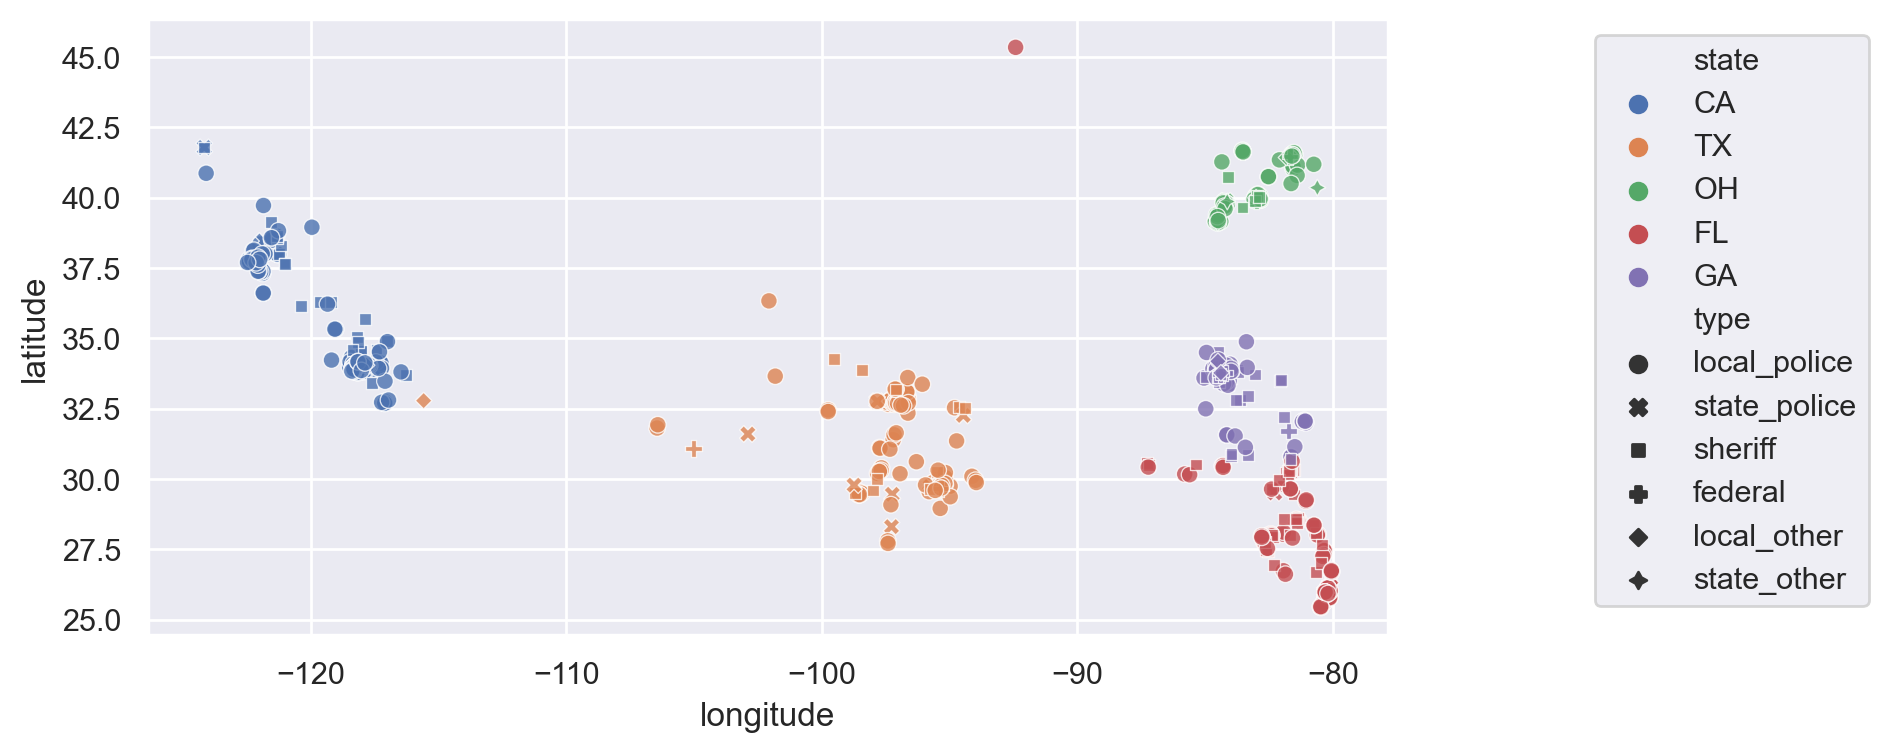

In [182]:
# let's make the sets clear by state
plt.figure(figsize=(8,4), dpi=200)
sns.scatterplot(data=black_plot, y='latitude', x='longitude', hue='state', style='type', alpha=.8)
plt.legend(bbox_to_anchor=(.9,.5,.5,.5))
plt.title('Only black people divided by state and type of armed force')
plt.show()

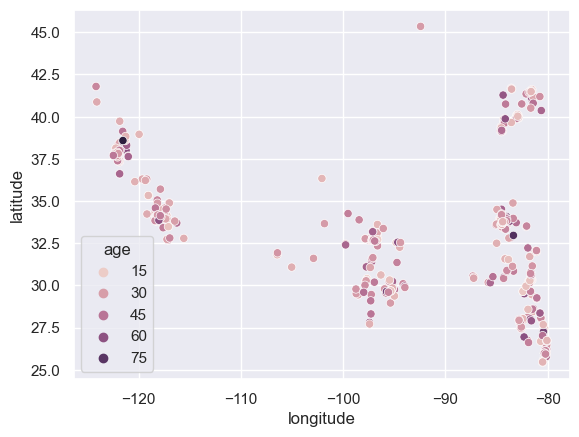

In [183]:
# let's look at the relationship with the ages
sns.scatterplot(data=black_plot, y='latitude', x='longitude', hue='age')
plt.title('Only black people Colored by age')
plt.show()

### Only blacks killed by gunfire

In [184]:
# I save those cases in which it ended with at least one gunshot
black_shooted = black.loc[black['threat_type'] == 'shoot']

In [185]:
black_shooted.head()

id_x        date threat_type flee_status armed_with        city  \
47   1201  2016-01-21       shoot         car        gun     Eufaula   
63   9071  2023-03-24       shoot       other        gun       Perry   
81   3324  2018-01-18       shoot         not        gun  Harrisburg   
95   6859  2021-05-11       shoot         not        gun    Stockton   
107  1595  2016-06-06       shoot         not        gun    Columbus   

       county state   latitude   longitude location_precision  \
47   McIntosh    OK  35.287321  -95.582485      not_available   
63      Noble    OK        NaN         NaN                NaN   
81    Dauphin    PA  40.265128  -76.862129      not_available   
95    unknown    CA  37.993116 -121.296050      not_available   
107  Franklin    OH  40.009173  -82.977147      not_available   

              criminal_name   age gender race    race_source  \
47            Cedric Norris  39.0   male    B   undetermined   
63   Rosendo Enrique Rivero  25.0   male    B  public_record   
81            Kevin Sturgis  31.0   male    B   undetermined   
95               Lance Lowe  30.0   male    B   undetermined   
107           Henry Green V  23.0   male    B   undetermined   

     was_mental_illness_related  body_camera  agency_ids  \
47                         True        False         101   
63                        False        False         101   
81                        False        False        1567   
95                        False        False         168   
107                       False        False          90   

                department_name          type  total_shootings  year  month  
47      Oklahoma Highway Patrol  state_police               21  2016      1  
63      Oklahoma Highway Patrol  state_police               21  2023      3  
81       U.S. Marshal's Service       federal                5  2018      1  
95   Stockton Police Department  local_police               15  2021      5  
107  Columbus Police Department  local_police               37  2016      6

In [186]:
# 683 people
black_shooted.shape

(696, 24)

In [187]:
# let's look at years distribution
black_shooted.year.value_counts().sort_values(ascending=False)

2021    103
2019    101
2020     85
2022     85
2016     82
2015     82
2018     77
2017     60
2023     21
Name: year, dtype: int64

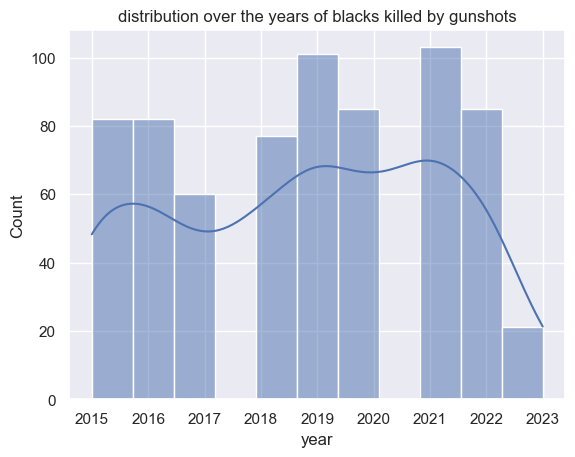

In [188]:
# Black people gunned by year
sns.histplot(data=black_shooted, x='year', kde=True)
plt.title('distribution over the years of blacks killed by gunshots')
plt.show()

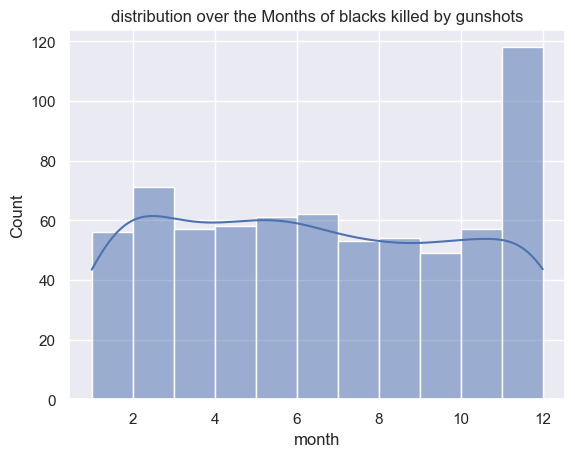

In [189]:
# Black people gunned by month
sns.histplot(data=black_shooted, x='month', kde=True)
plt.title('distribution over the Months of blacks killed by gunshots')
plt.show()

In [190]:
# let's percentage check the criminals' weapons
black_shooted.armed_with.value_counts('percentage')[:5]*100

# 98.43 had a gun.

gun            98.563218
replica         0.574713
gun;vehicle     0.287356
vehicle;gun     0.143678
other;gun       0.143678
Name: armed_with, dtype: float64

In [191]:
# let's take a look at the top 10 states
top_10_states = black_shooted.state.value_counts()[:10]
black_shooted.state.value_counts()[:10]

TX    53
FL    52
GA    49
CA    33
NC    32
LA    31
IL    28
PA    27
VA    27
NY    26
Name: state, dtype: int64

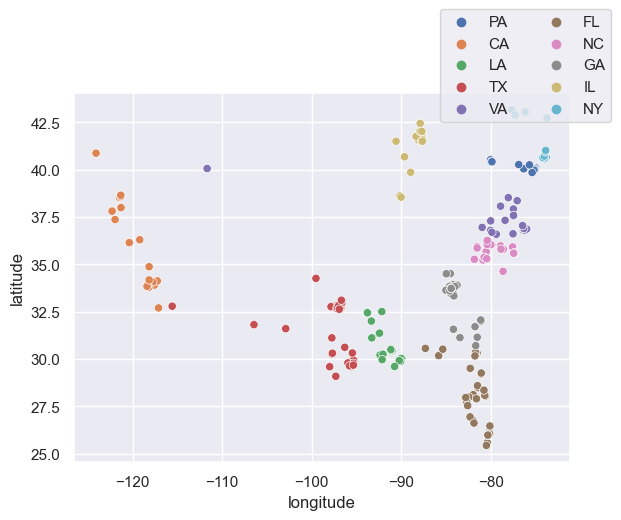

In [192]:
# let's make the sets clear by state
sns.scatterplot(data=black_shooted[black_shooted.state.isin(top_10_states.index)], y='latitude', x='longitude', hue='state')

plt.legend(loc="lower right", ncol=2, bbox_to_anchor=(1, 1)
plt.show('Top 10 States where black people are killed')
plt.show()

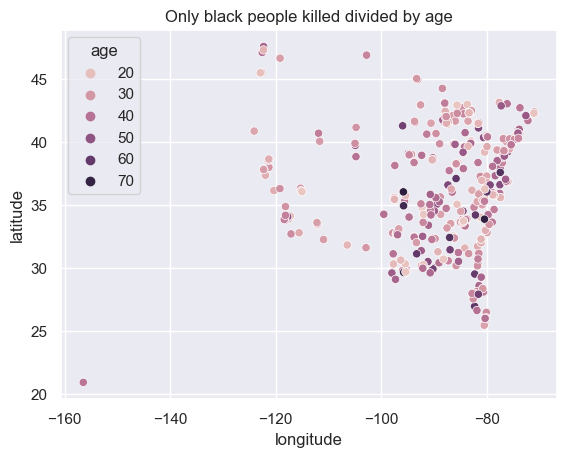

In [193]:
# let's see at the age
sns.scatterplot(data=black_shooted, y='latitude', x='longitude', hue='age')
plt.title('Only black people killed divided by age')
plt.show()

### research on racial motives Pt2

**RACE**

A = American Native or Alaskan Native 

B = Black or African American

P = Pacific Islander including Native Hawaiian

S = Asian

W = White

O = Unknown

**ETHNICITY**

H = Hispanic or Latino

N = Not Hispanic or Latino

In [194]:
# Here I show a general overview of the correlations between populations
data2_race.groupby('Geographic area').mean().corr()

# Dive deep..

share_white  share_black  share_native_american  \
share_white               1.000000    -0.599179              -0.376979   
share_black              -0.599179     1.000000              -0.223136   
share_native_american    -0.376979    -0.223136               1.000000   
share_asian              -0.493912    -0.026315              -0.105025   
share_hispanic           -0.247242    -0.098502               0.147117   

                       share_asian  share_hispanic  
share_white              -0.493912       -0.247242  
share_black              -0.026315       -0.098502  
share_native_american    -0.105025        0.147117  
share_asian               1.000000        0.125605  
share_hispanic            0.125605        1.000000

In [195]:
# we check ethnic integration for the three races of greatest interest in dataframe `data2`
print("Order: White, Black, Hispanic")
print(np.round((data2_race.share_white.mean()),2))
print(np.round((data2_race.share_black.mean()),2))
print(np.round((data2_race.share_hispanic.mean()),2))

Order: White, Black, Hispanic
83.21
6.83
9.33


In [196]:
# I save a dataframe divided by categories
black_liv = data2_race[['Geographic area','share_black']].sort_values('share_black', ascending=False)
white_liv = data2_race[['Geographic area','share_white']].sort_values('share_white', ascending=False)
hispanic_liv = data2_race[['Geographic area','share_hispanic']].sort_values('share_hispanic', ascending=False)

In [197]:
# look, geographically where black people are living
black_liv.groupby('Geographic area').mean().sort_values('share_black',ascending=False)[:10]

share_black
Geographic area             
DC                 50.700001
MS                 41.833977
SC                 32.834431
LA                 30.775476
GA                 30.633547
AL                 23.322319
NC                 20.402300
MD                 19.463900
VA                 16.510830
AR                 16.296858

In [198]:
# look, geographically where hispanic people are living
hispanic_liv.groupby('Geographic area').mean().sort_values('share_hispanic',ascending=False)[:10]

share_hispanic
Geographic area                
NM                    45.434536
TX                    39.364876
CA                    29.649868
AZ                    20.144567
CO                    17.898689
FL                    16.529131
NV                    13.173643
NJ                    11.122936
ID                    10.695154
WA                    10.608439

In [199]:
# look, geographically where white people are living
white_liv.groupby('Geographic area').mean().sort_values('share_white',ascending=False)[:10]

share_white
Geographic area             
IA                 96.705849
VT                 95.866386
ME                 95.686256
NH                 95.681252
WV                 95.035408
IN                 94.823898
NE                 94.717583
PA                 93.253235
KS                 92.962593
WI                 92.960541

In [200]:
#save a copy of this data for later assertions.
#N.b: I reuse the data in the merged_df part.
hispanic_liv_df = hispanic_liv.groupby('Geographic area').mean().sort_values('share_hispanic',ascending=False)
black_liv_df = black_liv.groupby('Geographic area').mean().sort_values('share_black',ascending=False)
white_liv_df = white_liv.groupby('Geographic area').mean().sort_values('share_white',ascending=False)

In [201]:
# relationship between where hispanic and whites live.
correlations = []
for state in hispanic_liv['Geographic area'].unique():
    black_pct = black_liv.loc[black_liv['Geographic area'] == state, 'share_black'].values
    hispanic_pct = hispanic_liv.loc[hispanic_liv['Geographic area'] == state, 'share_hispanic'].values
    white_pct = white_liv.loc[white_liv['Geographic area'] == state, 'share_white'].values
    
    if len(hispanic_pct) > 1 and len(white_pct) > 1 and np.nan not in black_pct and np.nan not in white_pct:
        if np.std(hispanic_pct) > 0 and np.std(white_pct) > 0:
            correlation = np.corrcoef(hispanic_pct, white_pct)[0, 1] 
            correlations.append(correlation)
mean_correlation = np.nanmean(correlations) 

print("relationship between where hispanic and whites live:\t")
print(np.round((mean_correlation),3)*100, "%")

49.5 %


In [202]:
# relationship between where black and whites lives.
correlations = []
for state in black_liv['Geographic area'].unique():
    black_pct = black_liv.loc[black_liv['Geographic area'] == state, 'share_black'].values
    white_pct = white_liv.loc[white_liv['Geographic area'] == state, 'share_white'].values
    
    if len(black_pct) > 1 and len(white_pct) > 1 and np.nan not in black_pct and np.nan not in white_pct:
        if np.std(black_pct) > 0 and np.std(white_pct) > 0:
            correlation = np.corrcoef(black_pct, white_pct)[0, 1] 
            correlations.append(correlation)
mean_correlation = np.nanmean(correlations) 

print("relationship between where black and whites lives:\t")
print(np.round((mean_correlation),3)*100, "%")

44.6 %


In [203]:
# let's now counting the races in the hole dataset `data2`
data2.race.value_counts()

W      3685
B      1940
H      1296
A       144
N       111
O        20
B;H       1
Name: race, dtype: int64

In [204]:
# Also the percentage
np.round((data2.race.value_counts('percentage') * 100),2)

W      51.20
B      26.96
H      18.01
A       2.00
N       1.54
O       0.28
B;H     0.01
Name: race, dtype: float64

In [205]:
# there is not enough data to make any assertions based on camera
data2[data2.race.isnull()]['body_camera'].value_counts('percentage') * 100

False    86.396761
True     13.603239
Name: body_camera, dtype: float64

In [206]:
white = data2[data2.race=='W']
black = data2[data2.race=='B']
hispanic = data2[data2.race=='H']

In [207]:
# let's look at the average age of the criminals
print("Order: White, Black, Hispanic")
print(np.round(white.age.mean(),2))
print(np.round(black.age.mean(),2))
print(np.round(hispanic.age.mean(),2))

Order: White, Black, Hispanic
40.17
32.9
33.66


In [208]:
# percentage of racially divided criminals who were found to be mentally ill
print("Order: White, Black, Hispanic")
print(np.round((white.was_mental_illness_related==True).mean(),2))
print(np.round((black.was_mental_illness_related==True).mean(),2))
print(np.round((hispanic.was_mental_illness_related==True).mean(),2))

Order: White, Black, Hispanic
0.27
0.15
0.16


In [209]:
# here we can see that most of these criminals "were not fleeing"
print("Order: White, Black, Hispanic")
print(white.flee_status.value_counts())
print("")
print(black.flee_status.value_counts())
print("")
hispanic.flee_status.value_counts()

Order: White, Black, Hispanic
not        2165
car         608
unknown     429
foot        357
other       126
Name: flee_status, dtype: int64

not        982
foot       378
car        303
unknown    197
other       80
Name: flee_status, dtype: int64



not        705
car        214
foot       189
unknown    119
other       69
Name: flee_status, dtype: int64

In [210]:
# let's check what weapons the criminals had
white['armed_with'].value_counts()[:10]

gun             2170
knife            613
unarmed          197
replica          151
unknown          151
vehicle          128
undetermined     114
blunt_object      84
other             35
gun;vehicle       17
Name: armed_with, dtype: int64

In [211]:
black['armed_with'].value_counts()[:10]

gun             1196
knife            261
unarmed          157
unknown           75
vehicle           67
undetermined      56
replica           55
blunt_object      32
other             19
gun;vehicle        8
Name: armed_with, dtype: int64

In [212]:
hispanic['armed_with'].value_counts()[:10]

gun             665
knife           274
unarmed          91
unknown          56
blunt_object     52
vehicle          44
undetermined     42
replica          40
other            16
gun;knife         8
Name: armed_with, dtype: int64

In [213]:
# we are looking for the usual datum, i.e. the type of weapons, but wanting the percentage
print("Order: White, Black, Hispanic")
print(np.round((white['armed_with'].value_counts('percentage')*100),2)[:5])
print("")
print(np.round((black['armed_with'].value_counts('percentage')*100),2)[:5])
print("")
print(np.round((hispanic['armed_with'].value_counts('percentage')*100),2)[:5])

Order: White, Black, Hispanic
gun        58.89
knife      16.64
unarmed     5.35
replica     4.10
unknown     4.10
Name: armed_with, dtype: float64

gun        61.65
knife      13.45
unarmed     8.09
unknown     3.87
vehicle     3.45
Name: armed_with, dtype: float64

gun             51.31
knife           21.14
unarmed          7.02
unknown          4.32
blunt_object     4.01
Name: armed_with, dtype: float64


In [214]:
# the youngest gun owner was 12 years old
data2[data2['armed_with']=='gun']['age'].min()

12.0

In [215]:
# check to see if there are minors in possession of weapons
merged_df[(merged_df['armed_with']=='gun')&(merged_df['age']<=18)].sort_values('age',ascending=True)[:10]

id_x        date   threat_type flee_status armed_with          city  \
3692  7785  2022-03-01          move        foot        gun  Philadelphia   
383   1776  2016-08-09         shoot        foot        gun   Los Angeles   
4670  3977  2018-08-18        threat       other        gun         Ceres   
2485   916  2015-10-15         point         car        gun         Miami   
2155  8207  2022-07-05          move         not        gun      Glendale   
617   1477  2016-04-19         point       other        gun     St. Louis   
128   5456  2020-01-30         point         not        gun      Columbus   
1644  8497  2022-10-06  undetermined     unknown        gun      Gulfport   
6441  3060  2017-08-03         point        foot        gun          Gary   
4474  7288  2021-11-02         shoot         not        gun  Aransas Pass   

              county state   latitude   longitude location_precision  \
3692         unknown    PA        NaN         NaN                NaN   
383      Los Angeles    CA  34.038029 -118.215034      not_available   
4670         unknown    CA  37.580188 -120.801356      not_available   
2485      Miami-Dade    FL  25.506927  -80.412514      not_available   
2155         unknown    AZ        NaN         NaN                NaN   
617   St. Louis City    MO  38.654008  -90.219480      not_available   
128          unknown    OH  39.971568  -82.912924      not_available   
1644         unknown    MS  30.386168  -89.069273      not_available   
6441            Lake    IN  41.583446  -87.401064      not_available   
4474         unknown    TX  27.740598  -97.428892      not_available   

                  criminal_name   age gender race   race_source  \
3692  Thomas Joseph Siderio Jr.  12.0   male    W         photo   
383          Jesse James Romero  14.0   male    H  undetermined   
4670      Carmen Spencer Mendez  15.0   male    H  undetermined   
2485       Jorge Santiago Tapia  15.0   male    H  undetermined   
2155      Juan Carlos Bojorquez  15.0   male    H         photo   
617             Jorevis Scruggs  15.0   male    B  undetermined   
128            Abdirahman Salad  15.0   male    B  undetermined   
1644            Jaheim McMillan  15.0   male    B          clip   
6441              Kemonte Cobbs  15.0   male    B  undetermined   
4474              Kody Marshall  15.0   male  NaN  undetermined   

      was_mental_illness_related  body_camera  agency_ids  \
3692                       False        False         671   
383                        False         True          38   
4670                       False         True           2   
2485                       False        False         219   
2155                       False        False          62   
617                        False        False         134   
128                        False        False          90   
1644                       False        False         392   
6441                       False        False        1919   
4474                       False        False         934   

                       department_name          type  total_shootings  year  \
3692    Philadelphia Police Department  local_police               30  2022   
383      Los Angeles Police Department  local_police              122  2016   
4670           Ceres Police Department  local_police                3  2018   
2485      Miami-Dade Police Department  local_police               44  2015   
2155        Glendale Police Department  local_police               17  2022   
617        St. Louis Police Department  local_police               28  2016   
128         Columbus Police Department  local_police               37  2020   
1644        Gulfport Police Department  local_police                7  2022   
6441            Gary Police Department  local_police                6  2017   
4474  Corpus Christi Police Department  local_police               14  2021   

      month  
3692      3  
383       8  
4670      8  
2485     10  
2155      7  
6

1) [Thomas Joseph Siderio Jr.](https://abc7chicago.com/thomas-siderio-jr-philadelphia-shooting-police-12-year-old-killed/11615435/) 12 anni

2) [Jesse James Romero](https://homicide.latimes.com/post/jesse-james-romero/) 14 anni






In [216]:
# let's take a collective look at the age of criminals who had a gun
data2[data2['armed_with']=='gun']['age'].value_counts().head(15)

32.0    161
31.0    157
33.0    156
34.0    148
29.0    146
28.0    145
27.0    144
35.0    142
25.0    134
30.0    130
26.0    128
37.0    126
24.0    121
36.0    120
39.0    120
Name: age, dtype: int64

In [217]:
# let's look at the major states involved with white people
white['state'].value_counts()[:10]

CA    289
TX    270
FL    241
AZ    149
TN    148
CO    141
OK    132
OH    127
NC    127
GA    124
Name: state, dtype: int64

In [218]:
# same as up but with black people
black['state'].value_counts()[:10]

CA    173
FL    161
TX    160
GA    126
OH     89
LA     88
IL     80
NC     77
MO     70
MD     67
Name: state, dtype: int64

In [219]:
# same with Hispanic
hispanic['state'].value_counts()[:10]

CA    444
TX    211
AZ    115
NM     96
FL     68
CO     67
NV     37
WA     28
GA     19
UT     17
Name: state, dtype: int64

### Criminals

In [220]:
# here I look for trends in the modus operandi of criminals [by months]
data2.month.value_counts()[:10]

3     816
1     783
2     756
4     735
10    694
6     691
12    686
8     685
7     675
5     662
Name: month, dtype: int64

In [221]:
underage = [12,13,14,15,16,17]
ages = [12,13,14,15,16,17,18,19,20]

In [222]:
# 63 minors had a gun, also 279 under 20 had a gun.
print(data2[data2['armed_with']=='gun']['age'].isin(underage).value_counts())
data2[data2['armed_with']=='gun']['age'].isin(ages).value_counts()

False    4810
True       63
Name: age, dtype: int64


False    4594
True      279
Name: age, dtype: int64

### I do some research on possible correlations to the column mental illness

In [223]:
# first we look at the differences between disease cases and race 
data2[data2.was_mental_illness_related==True]['race'].value_counts()

W    997
B    293
H    209
A     33
N     18
O      6
Name: race, dtype: int64

In [224]:
# we continue analyzing the correlation with the states
data2[data2.was_mental_illness_related==True]['state'].value_counts()[:10]

CA    240
FL    140
TX    139
WA     66
AZ     63
OH     58
GA     56
NC     53
NY     51
TN     50
Name: state, dtype: int64

In [225]:
# even more in depth with cities 
data2[data2.was_mental_illness_related==True]['city'].value_counts()[:10]

Las Vegas       23
Los Angeles     17
Houston         17
Austin          15
Phoenix         15
Albuquerque     13
Jacksonville    11
Fresno          10
San Diego       10
New York        10
Name: city, dtype: int64

In [226]:
# we also look at the mean group age
data2[data2.was_mental_illness_related==True]['age'].mean()

39.68690476190476

### Agency Ispection

In [227]:
# check if some department was more involved 
data2_agency.name.value_counts()[:10]

U.S. Marshals Service                    35
Federal Bureau of Investigation          21
Washington County Sheriff's Office       10
Jefferson County Sheriff's Department     8
Clinton Police Department                 7
U.S. Border Patrol                        6
Polk County Sheriff's Office              6
Franklin County Sheriff's Department      6
Auburn Police Department                  6
Lake County Sheriff's Office              6
Name: name, dtype: int64

In [228]:
# check the first department
data2_agency[data2_agency.name == 'U.S. Marshals Service'].sort_values('total_shootings', ascending=False)[:5]

id                   name     type state  \
2964  1173  U.S. Marshals Service  federal    TX   
2935  2267  U.S. Marshals Service  federal    AZ   
2963  1409  U.S. Marshals Service  federal    TN   
2950  2080  U.S. Marshals Service  federal    MO   
2955  1114  U.S. Marshals Service  federal    NM   

                                     oricodes  total_shootings  
2964  TXUSM0100;TXUSM0200;TXUSM0300;TXUSM0400               13  
2935                                AZUSM0100                8  
2963            TNUSM0100;TNUSM0200;TNUSM0300                6  
2950                      MOUSM0100;MOUSM0200                6  
2955                                NMUSM0100                5

In [229]:
# I check which department has the easier trigger 
data2_agency.type.value_counts()[:10]

local_police    1933
sheriff         1032
federal          111
state_police      63
local_other       43
state_other       24
other             14
Name: type, dtype: int64

In [234]:
# I save two dataframe containing only "local_police" and "sheriff"
local_police = merged_df[merged_df.type=='local_police']
sheriff = merged_df[merged_df.type=='sheriff']

In [241]:
# cross the name of the department with the amount of shots, a figure that should not be underestimated
# LOCAL POLICE
local_police.sort_values('total_shootings', ascending=False).head(10)

id_x        date threat_type flee_status armed_with         city  \
416  4134  2018-10-29        move         not      other    Hollywood   
448  7284  2021-10-31      threat     unknown      knife  Los Angeles   
446  7551  2021-10-08      attack         not        gun  Los Angeles   
445  7058  2021-07-26      attack         not      knife  Los Angeles   
444  7046  2021-07-15       point         not    replica  Los Angeles   
443  7592  2021-06-28        move         car        gun       Arleta   
442  7633  2021-04-27       shoot         car        gun  Los Angeles   
441  6804  2021-04-24        move         not    unarmed  Los Angeles   
440  6728  2021-03-29      threat        foot        gun  Los Angeles   
439  6713  2021-03-19      attack        foot      knife  Los Angeles   

      county state   latitude   longitude location_precision  \
416  unknown    CA  34.097743 -118.326978      not_available   
448  unknown    CA  34.186680 -118.435638      not_available   
446  unknown    CA        NaN         NaN                NaN   
445  unknown    CA  34.009981 -118.427272      not_available   
444  unknown    CA  34.101419 -118.336260      not_available   
443  unknown    CA        NaN         NaN                NaN   
442  unknown    CA  34.029131 -118.298081      not_available   
441  unknown    CA  34.098064 -118.361564      not_available   
440  unknown    CA  34.050862 -118.264202      not_available   
439  unknown    CA  34.056898 -118.273613      not_available   

                 criminal_name   age gender race   race_source  \
416        Albert Ramon Dorsey  30.0   male    B  undetermined   
448                        NaN   NaN   male  NaN  undetermined   
446              Rudy Anderson  45.0   male    B          clip   
445  Hermenegildo Gonzalez Jr.  58.0   male    H          clip   
444                        NaN   NaN   male  NaN  undetermined   
443         Christopher Garcia  26.0   male    H          clip   
442      Carlos Lopez-Melendez  50.0   male    H         photo   
441            Richard Solitro  34.0   male    W  undetermined   
440           Matthew Blaylock  38.0   male    B  undetermined   
439                        NaN   NaN   male  NaN  undetermined   

     was_mental_illness_related  body_camera  agency_ids  \
416                       False         True          38   
448                       False        False          38   
446                       False         True          38   
445                       False        False          38   
444                       False         True          38   
443                       False         True          38   
442                       False        False          38   
441                        True         True          38   
440                       False        False          38   
439                       False         True          38   

                   department_name          type  total_shootings  year  month  
416  Los Angeles Police Department  local_police              122  2018     10  
448  Los Angeles Police Department  local_police              122  2021     10  
446  Los Angeles Police Department  local_police              122  2021     10  
445  Los Angeles Police Department  local_police              122  2021      7  
444  Los Angeles Police Department  local_police              122  2021      7  
443  Los Angeles Police Department  local_police              122  2021      6  
442  Los Angeles Police Department  local_police              122  2021      4  
441  Los Angeles Police Department  local_police              122  2021      4  
440  Los Angeles Police Department  local_police              122  2021      3  
439  Los Angeles Police Department  local_police              122  2021      3

In [236]:
# cross the name of the department with the amount of shots, a figure that should not be underestimated
# SHERIFF
sheriff.sort_values('total_shootings', ascending=False).head(10)

id_x        date threat_type flee_status    armed_with  \
1908  3389  2018-02-06      threat         car       unknown   
1919  4775  2019-06-06      threat         not           gun   
1912  3984  2018-08-18        move         not         knife   
1913  8304  2018-09-19       shoot         car           gun   
1914  8305  2018-09-19        flee         car       unarmed   
1915  4054  2018-09-24       shoot         not           gun   
1916  4577  2019-03-16       shoot         not           gun   
1917  4741  2019-05-21      threat     unknown  blunt_object   
1918  4773  2019-06-06        flee         car       unarmed   
1920  4820  2019-06-27    accident         not       unarmed   

                  city       county state   latitude   longitude  \
1908       Los Angeles  Los Angeles    CA  34.033327 -118.158623   
1919       Los Angeles      unknown    CA  33.931906 -118.200464   
1912       Los Angeles      unknown    CA  34.015103 -118.401386   
1913       Los Angeles      unknown    CA        NaN         NaN   
1914       Los Angeles      unknown    CA        NaN         NaN   
1915  East Los Angeles      unknown    CA  34.047940 -118.187271   
1916          Palmdale      unknown    CA  34.563030 -118.058321   
1917       Los Angeles      unknown    CA  33.930384 -118.197948   
1918       Los Angeles      unknown    CA  33.912791 -118.269625   
1920       Los Angeles      unknown    CA  34.030221 -118.143652   

     location_precision          criminal_name   age gender race  \
1908      not_available         Cesar Bautista  37.0   male    H   
1919      not_available          Edtwon Stamps  27.0   male    B   
1912      not_available       Michael Harrison  30.0   male    W   
1913                NaN           Rene Herrera  39.0   male    H   
1914                NaN          Fernando Cruz  18.0   male    H   
1915      not_available              Ivan Pena  42.0   male    H   
1916      not_available  Timothy John Beckwith  48.0   male    W   
1917      not_available    Juan Antonio Sillas  21.0   male    H   
1918      not_available            Ryan Twyman  24.0   male    B   
1920      not_available         Paul David Rea  18.0   male    H   

       race_source  was_mental_illness_related  body_camera  agency_ids  \
1908  undetermined                       False        False          20   
1919  undetermined                       False        False          20   
1912  undetermined                       False        False          20   
1913  undetermined                       False        False          20   
1914  undetermined                       False        False          20   
1915  undetermined                       False        False          20   
1916  undetermined                       False        False          20   
1917  undetermined                       False        False          20   
1918  undetermined                       False        False          20   
1920  undetermined                       False        False          20   

                              department_name     type  total_shootings  year  \
1908  Los Angeles County Sheriff's Department  sheriff              100  2018   
1919  Los Angeles County Sheriff's Department  sheriff              100  2019   
1912  Los Angeles County Sheriff's Department  sheriff              100  2018   
1913  Los Angeles County Sheriff's Department  sheriff              100  2018   
1914  Los Angeles County Sheriff's Department  sheriff              100  2018   
1915  Los Angeles County Sheriff's Department  sheriff              100  2018   
1916  Los Angeles County Sheriff's Department  sheriff              100  2019   
1917  Los Angeles County Sheriff's Department  sheriff              100  2019   
1918  Los Angeles County Sheriff's Department  sheriff              100  2019   
1920  Los Angeles County Sheriff's Department  sheriff              100  2019   

      month  
1908      2  
1919      6  
1912      8  
1913      9  
1914      9  
1

In [238]:
# I check the Police departments with the highest number of interventions
local_police.criminal_name.value_counts()[:10]

Robert Wickizer        4
Joaquin Hernandez      3
Taylor Lee Shomaker    3
Kiser L. Sturgell      3
Salvador Muna          3
Ronald L. Klitzka      3
Ronnie Jerome Hill     3
Lamar Alexander        3
Zachary Alvarenga      3
John H. Fetter         3
Name: criminal_name, dtype: int64

In [243]:
# I check the Sheriff departments with the highest number of interventions
sheriff.criminal_name.value_counts()[:10]

Kelly Shannon Bowen      3
Jim Wright               3
Bruce Diehl              2
Michael Johnson          2
Michael Wayne Smashey    2
Curtis Kimbrough         2
Mark Stoddard            2
Gerald Robert Boyes      2
Peter J. Doffin Jr.      2
Leroy D. Malone          2
Name: criminal_name, dtype: int64

In [244]:
# I check the states with the highest number of interventions for Police
local_police.state.value_counts()[:10]

CA    786
TX    561
AZ    308
CO    229
FL    224
OK    168
OH    166
MO    165
GA    161
WA    155
Name: state, dtype: int64

In [245]:
# I check the states with the highest number of interventions for Sheriff
sheriff.state.value_counts()[:10]

CA    386
FL    312
TX    170
GA    145
NC    108
TN    104
LA     98
SC     96
WA     80
CO     79
Name: state, dtype: int64

In [246]:
# Here I check the state though on the whole dataframe
data2_agency.state.value_counts()[:10]

CA    253
TX    248
GA    143
FL    130
NC    125
TN    119
OH    116
OK    108
MO     92
IL     91
Name: state, dtype: int64

### Black_Days a dataframe containing the days where the most killings occurred

In [247]:
# In this case I check if there have been cases of shootings on equal days
data2.date.value_counts()[:10]

2020-05-26    9
2018-01-06    9
2019-01-28    9
2018-06-29    9
2021-06-24    9
2018-02-01    9
2018-04-01    9
2021-11-28    9
2023-01-02    8
2017-12-26    8
Name: date, dtype: int64

In [248]:
# I save a copy of the list, so I can use it later
date_up_to_5 = merged_df['date'].value_counts().head(470).to_frame()
date_up_to_5 = date_up_to_5.reset_index()

In [249]:
# here I would like to look for some correlation
black_days = merged_df[merged_df['date'].isin(date_up_to_5['index'])]
black_days.head(3)

id_x        date threat_type flee_status armed_with      city      county  \
5   1574  2016-05-30       point         not        gun  Tualatin  Washington   
8    765  2015-08-22      attack         car    unknown   Wichita    Sedgwick   
17  6462  2020-12-30       shoot        foot        gun   Wichita     unknown   

   state   latitude   longitude location_precision      criminal_name   age  \
5     OR  45.389114 -122.776432      not_available    Robert Wickizer  70.0   
8     KS  37.673250  -97.412773      not_available    Nicholas Garner  26.0   
17    KS  37.699397  -97.355342      not_available  Jason A. Williams  37.0   

   gender race   race_source  was_mental_illness_related  body_camera  \
5    male    W  undetermined                       False        False   
8    male    W  undetermined                       False        False   
17   male    W  undetermined                       False        False   

    agency_ids                     department_name          type  \
5           70  Washington County Sheriff's Office       sheriff   
8          238           Wichita Police Department  local_police   
17         238           Wichita Police Department  local_police   

    total_shootings  year  month  
5                 4  2016      5  
8                14  2015      8  
17               14  2020     12

In [250]:
black_days.race.value_counts()

W      1318
B       679
H       449
A        43
N        31
O         7
B;H       1
Name: race, dtype: int64

In [251]:
black_days.type.value_counts()

local_police    1684
sheriff          871
state_police     247
federal           79
local_other       22
state_other       10
other              5
Name: type, dtype: int64

In [252]:
# states most involved
black_days.state.value_counts()[:7]

CA    386
TX    269
FL    181
AZ    140
CO    118
GA    107
MO     96
Name: state, dtype: int64

In [254]:
# let's see if we have recurring names among law enforcement
black_days.criminal_name.value_counts()[:6]

Robert Wickizer          5
Kelly Shannon Bowen      5
Fred H. Wild III         4
Smokey Lynn Crockett     4
Brandon Jones            4
Robert Charles Foster    4
Name: criminal_name, dtype: int64

## merged_df: Deep considerations

In [255]:
show_all_columns(merged_df, 3)

id_x        date threat_type flee_status armed_with       city   county  \
0     3  2015-01-02       point         not        gun    Shelton    Mason   
1   758  2015-08-21       point         not        gun  Grapeview    Mason   
2  5685  2020-03-24      attack         car    vehicle    Shelton  unknown   

  state   latitude   longitude location_precision    criminal_name   age  \
0    WA  47.246826 -123.121592      not_available       Tim Elliot  53.0   
1    WA  47.286345 -122.924468      not_available    Timmy Walling  57.0   
2    WA  47.333423 -122.958007      not_available  Kathryn R. Hale  32.0   

   gender race   race_source  was_mental_illness_related  body_camera  \
0    male    A  undetermined                        True        False   
1    male    W  undetermined                        True        False   
2  female    W  undetermined                       False        False   

   agency_ids                department_name     type  total_shootings  year  \
0          73  Mason County Sheriff's Office  sheriff                3  2015   
1          73  Mason County Sheriff's Office  sheriff                3  2015   
2          73  Mason County Sheriff's Office  sheriff                3  2020   

   month  
0      1  
1      8  
2      3

In [256]:
merged_df.shape

(9048, 24)

In [257]:
# I save a dataframe where there have been more/equal than 4 victims in the usual day
black_days_idx_high = merged_df.date.value_counts().head(500).to_frame()
black_days_idx_high = black_days_idx_high.reset_index()
black_days_high = merged_df[merged_df.date.isin(black_days_idx_high['index'])]


# i do it also in the merged_df 
black_days_idx_low = merged_df.date.value_counts().head(1100).to_frame()
black_days_idx_low = black_days_idx_low.reset_index()
black_days_low = merged_df[merged_df.date.isin(black_days_idx_low['index'])]

In [258]:
# i'm here save a list with the only Black and Hispanic races.
list_of_race = ['B','H']
racial_df = merged_df[merged_df.race.isin(list_of_race)]
racial_df.race.value_counts()

B    2046
H    1366
Name: race, dtype: int64

In [259]:
# here I save a dataframe where the hits are greater than 1
shoot_data_full = merged_df[merged_df.total_shootings.isin(range(2,150))]

shoot_data_low = merged_df[merged_df.total_shootings.isin(range(1,45))]
shoot_data_low.total_shootings.value_counts()[:5]

1    1919
2    1068
3     819
4     508
5     475
Name: total_shootings, dtype: int64

In [260]:
# I save a dataframe with the most active departments
department_inv_idx = merged_df.department_name.value_counts().head(62).to_frame()
department_inv_idx = department_inv_idx.reset_index()
department_inv = merged_df[merged_df.department_name.isin(department_inv_idx['index'])]

In [261]:
# I save a dataframe where I exclude all criminals with firearms
armed_list_to_remove = ['gun', 'gun;vehicle', 'gun;knife', 'vehicle;gun', 'other;gun']
criminals_without_guns = merged_df[~merged_df.armed_with.isin(armed_list_to_remove)]

In [262]:
# I save a dataframe with trigger happy law enforcement
force = ['local_police','sheriff']
trigger_happy_law_enforcement = merged_df[merged_df.type.isin(force)]

In [263]:
show_all_columns(merged_df, 3)

id_x        date threat_type flee_status armed_with       city   county  \
0     3  2015-01-02       point         not        gun    Shelton    Mason   
1   758  2015-08-21       point         not        gun  Grapeview    Mason   
2  5685  2020-03-24      attack         car    vehicle    Shelton  unknown   

  state   latitude   longitude location_precision    criminal_name   age  \
0    WA  47.246826 -123.121592      not_available       Tim Elliot  53.0   
1    WA  47.286345 -122.924468      not_available    Timmy Walling  57.0   
2    WA  47.333423 -122.958007      not_available  Kathryn R. Hale  32.0   

   gender race   race_source  was_mental_illness_related  body_camera  \
0    male    A  undetermined                        True        False   
1    male    W  undetermined                        True        False   
2  female    W  undetermined                       False        False   

   agency_ids                department_name     type  total_shootings  year  \
0          73  Mason County Sheriff's Office  sheriff                3  2015   
1          73  Mason County Sheriff's Office  sheriff                3  2015   
2          73  Mason County Sheriff's Office  sheriff                3  2020   

   month  
0      1  
1      8  
2      3

### Racial Indagation Pt.3

In [264]:
# on days with many shots I look for isolated cases, below I report a few cases.
# N.B I limit the list of results for a better interpretation, 
# my investigations are carried out on the complete set
racial_df[(racial_df.total_shootings>=122) & (racial_df.age<= 30)].sort_values('age')[:3]

id_x        date threat_type flee_status armed_with         city  \
451  7450  2021-12-23    accident        foot    unarmed  Los Angeles   
383  1776  2016-08-09       shoot        foot        gun  Los Angeles   
387  1922  2016-10-02       point         not    replica  Los Angeles   

          county state   latitude   longitude location_precision  \
451      unknown    CA        NaN         NaN                NaN   
383  Los Angeles    CA  34.038029 -118.215034      not_available   
387  Los Angeles    CA  34.000220 -118.249952      not_available   

                  criminal_name   age  gender race   race_source  \
451  Valentina Orellana-Peralta  14.0  female    H          clip   
383          Jesse James Romero  14.0    male    H  undetermined   
387                Daniel Perez  16.0    male    H  undetermined   

     was_mental_illness_related  body_camera  agency_ids  \
451                       False         True          38   
383                       False         True          38   
387                        True         True          38   

                   department_name          type  total_shootings  year  month  
451  Los Angeles Police Department  local_police              122  2021     12  
383  Los Angeles Police Department  local_police              122  2016      8  
387  Los Angeles Police Department  local_police              122  2016     10

[Luis Herrera, 19, replica](https://tebigeek.com/luis-herrera-adolescente-di-los-angeles-19-anni-con-una-pistola-softair-ucciso-da-un-poliziotto-dopo-aver-chiamato-i-servizi-di-emergenza-per-denunciare-che-papa-ubriaco-ha-picchiato-la-mamma/)

[Daniel Perez 16, replica](https://abc7.com/south-los-angeles-lapd-shooting-officer-involved-la-police-newton-division/1543062/)

[Cesar Frias 20, knife, mental_p](https://homicide.latimes.com/post/cesar-frias/)

[Nathaniel Robert 22, Machete;car](https://homicide.latimes.com/post/nathaniel-robert-pinnock/)

[Brendon K. Glenn 29, unarmed](https://homicide.latimes.com/post/brendon-k-glenn/)

[Carnell Delone Snell Jr. 18, gun](https://homicide.latimes.com/post/carnell-snell-jr/)

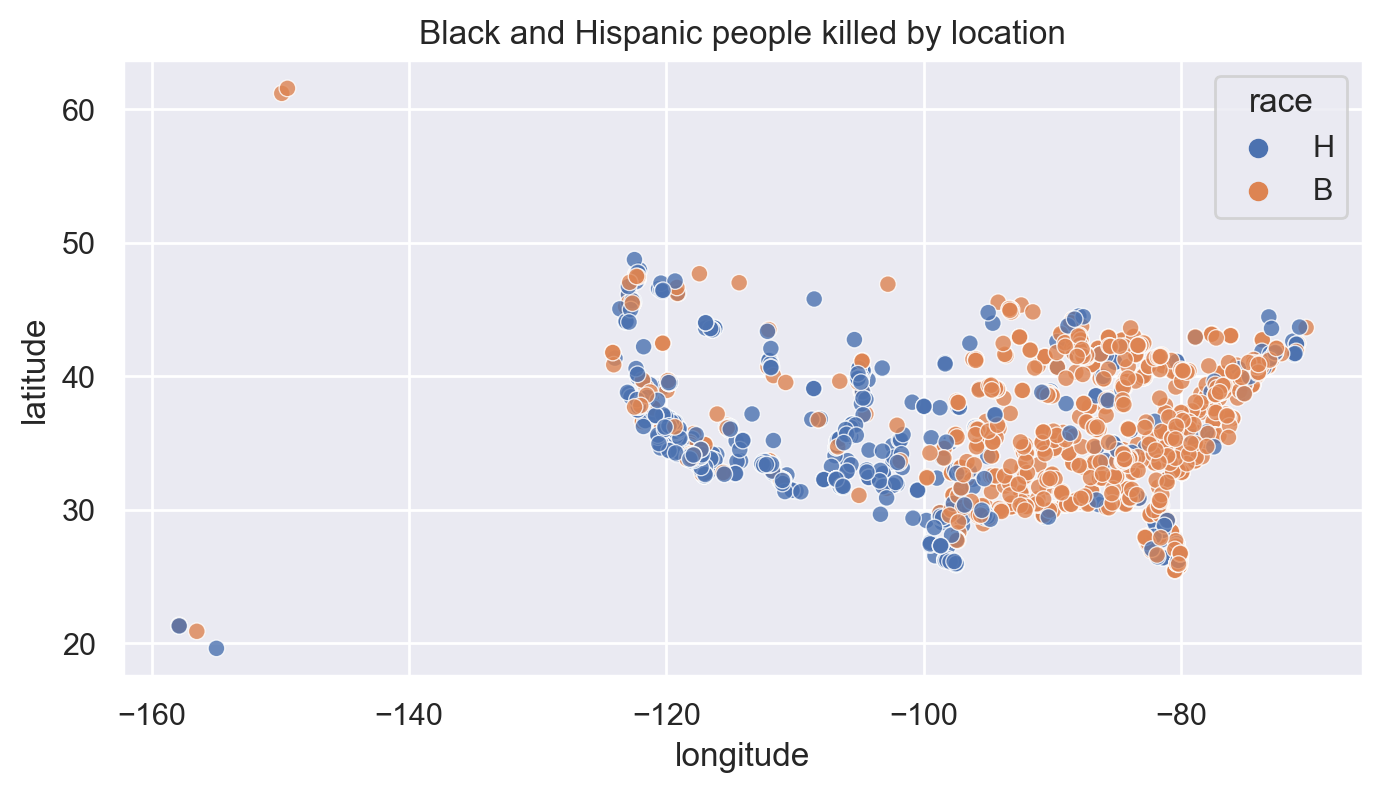

In [265]:
plt.figure(figsize=(8,4),dpi=200)
sns.scatterplot(data=racial_df, y='latitude',x='longitude', hue='race', alpha=.8)
plt.title('Black and Hispanic people killed by location')
plt.show()

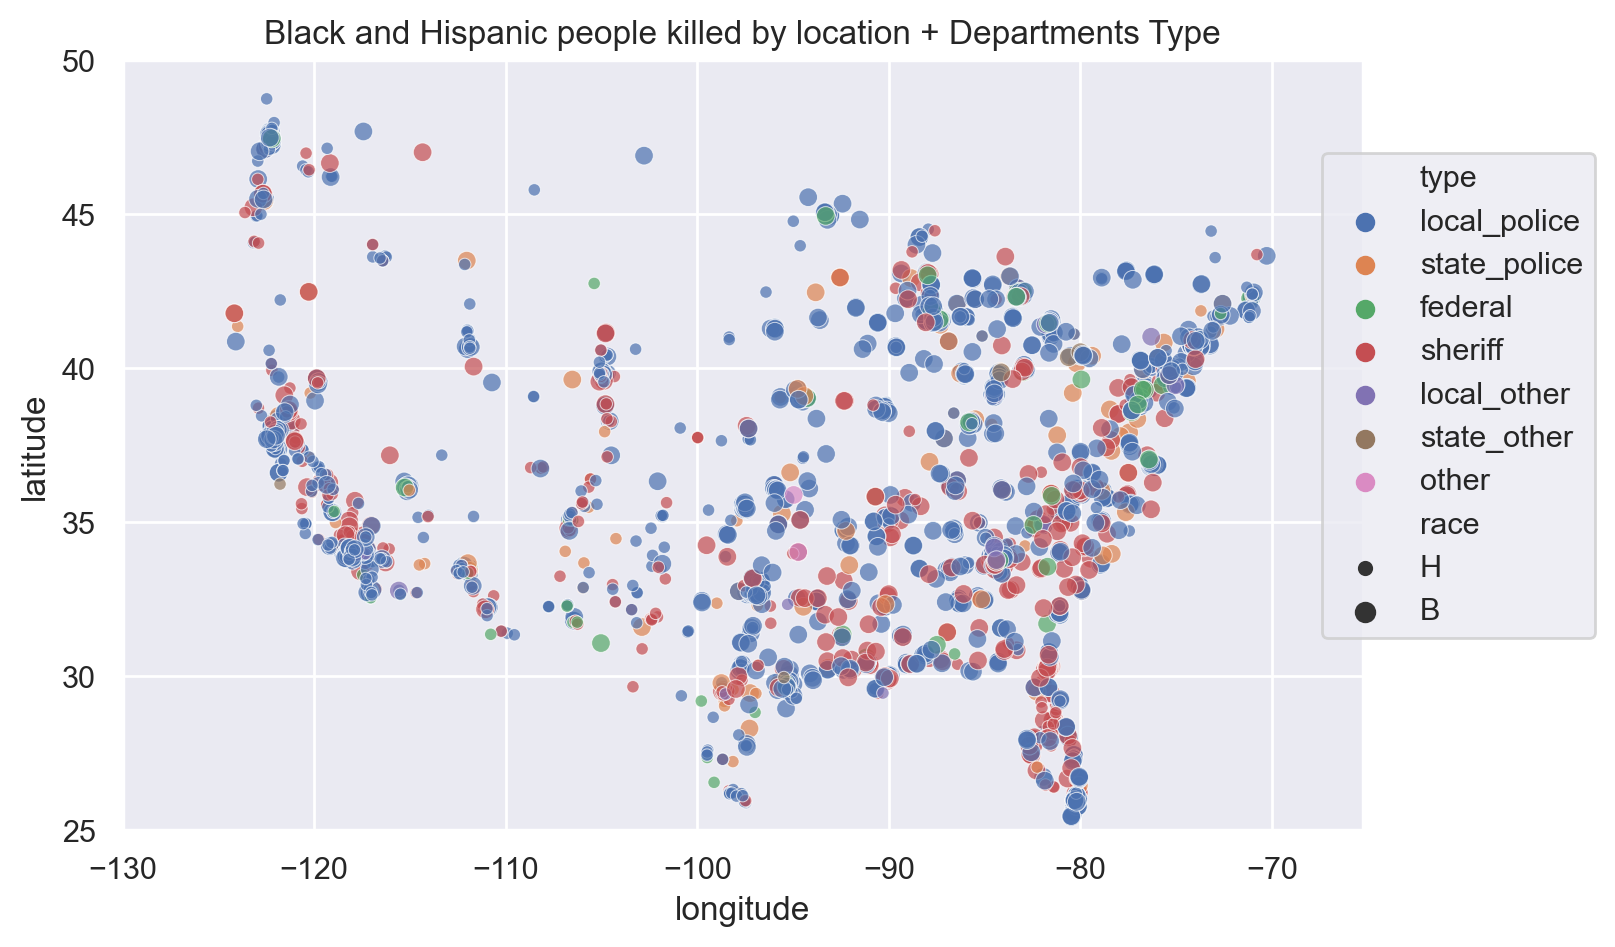

In [266]:
size_mapping = {'B': 45, 'H': 20}
plt.figure(figsize=(8,5),dpi=200)
sns.scatterplot(data=racial_df, y='latitude',x='longitude', hue='type', alpha=.7, size='race', sizes=size_mapping)

plt.legend(bbox_to_anchor=(1.2, .9))
plt.title('Black and Hispanic people killed by location + Departments Type')
plt.xlim(-130,racial_df.longitude.max()+5)
plt.ylim(25,50)
plt.show()

### law enforcement investigation

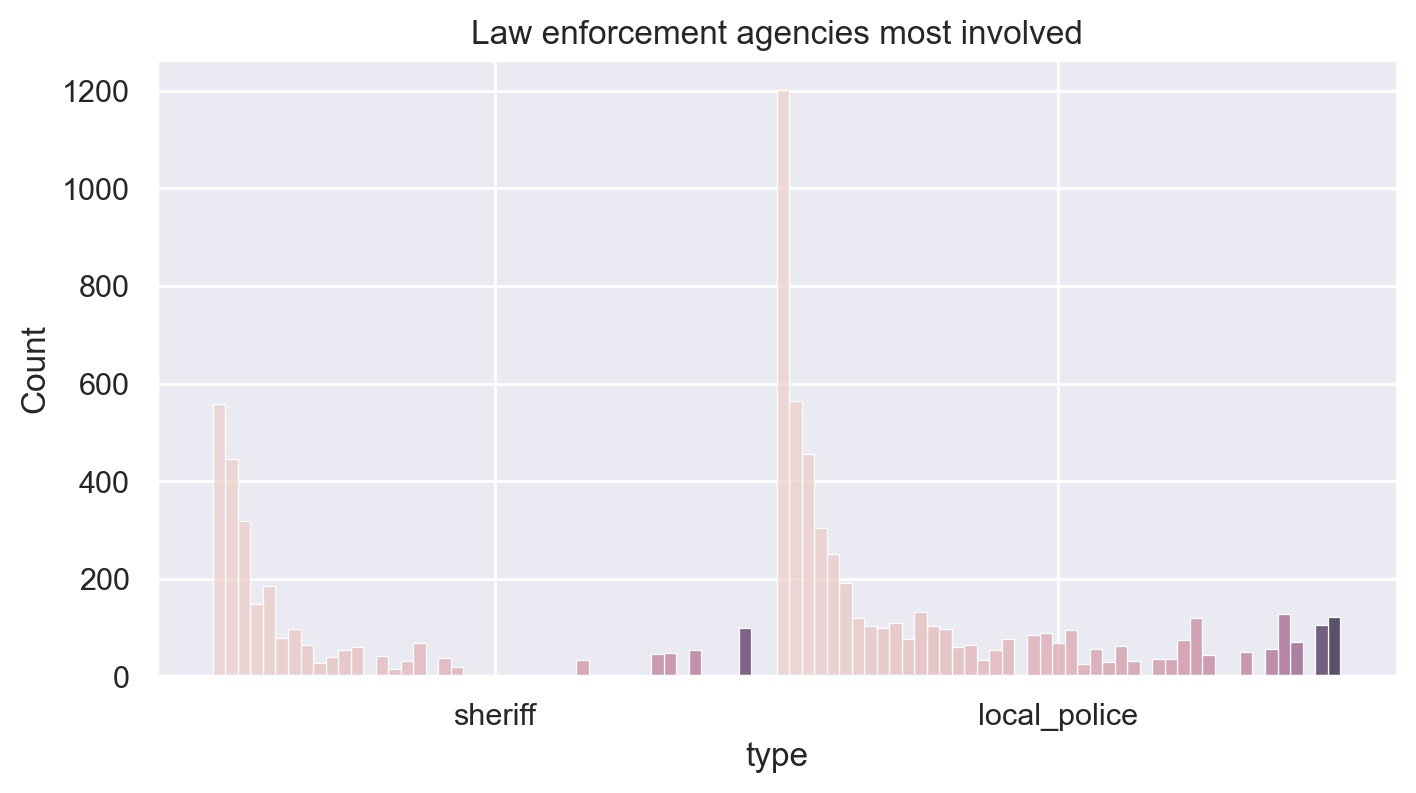

In [267]:
plt.figure(figsize=(8, 4), dpi=200)
sns.histplot(data=trigger_happy_law_enforcement, x='type', hue='total_shootings', multiple='dodge', legend=False)
plt.title('Law enforcement agencies most involved')
plt.show()

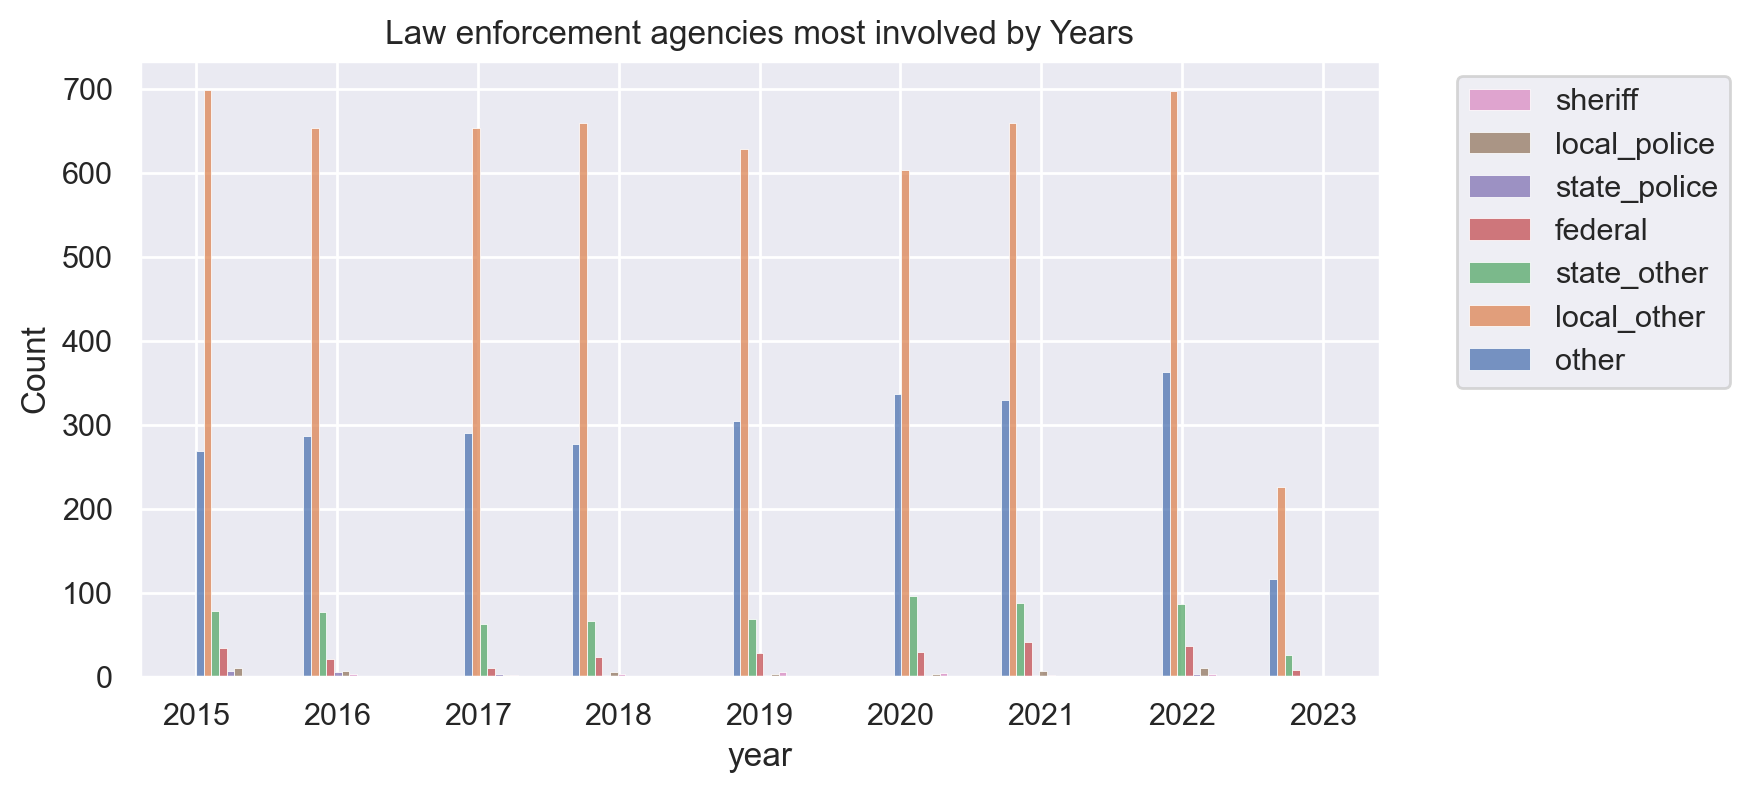

In [386]:
# let's look at the trend over the years of those who intervened the most
plt.figure(figsize=(8,4),dpi=200)
ax = sns.histplot(data=merged_df, x='year', hue='type', multiple='dodge')

labels = merged_df['type'].unique()
ax.legend(labels=labels, bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_title('Law enforcement agencies most involved by Years')  
plt.show()

### research in case histories criminals without weapons

In [289]:
criminals_without_guns.head(3)

id_x        date threat_type flee_status armed_with               city  \
2  5685  2020-03-24      attack         car    vehicle            Shelton   
4   890  2015-10-02      threat         not      knife              Aloha   
6  5851  2020-05-28        move         not      knife  Washington County   

       county state   latitude   longitude location_precision  \
2     unknown    WA  47.333423 -122.958007      not_available   
4  Washington    OR  45.492685 -122.861795      not_available   
6     unknown    OR  45.500109 -122.764895      not_available   

          criminal_name   age  gender race   race_source  \
2       Kathryn R. Hale  32.0  female    W  undetermined   
4  Phyllis Ilene Jepsen  55.0  female    W  undetermined   
6      Robert Whitehead  26.0    male    W  undetermined   

   was_mental_illness_related  body_camera  agency_ids  \
2                       False        False          73   
4                        True        False          70   
6                       False         True          70   

                      department_name     type  total_shootings  year  month  
2       Mason County Sheriff's Office  sheriff                3  2020      3  
4  Washington County Sheriff's Office  sheriff                4  2015     10  
6  Washington County Sheriff's Office  sheriff                4  2020      5

In [290]:
len(criminals_without_guns)

3640

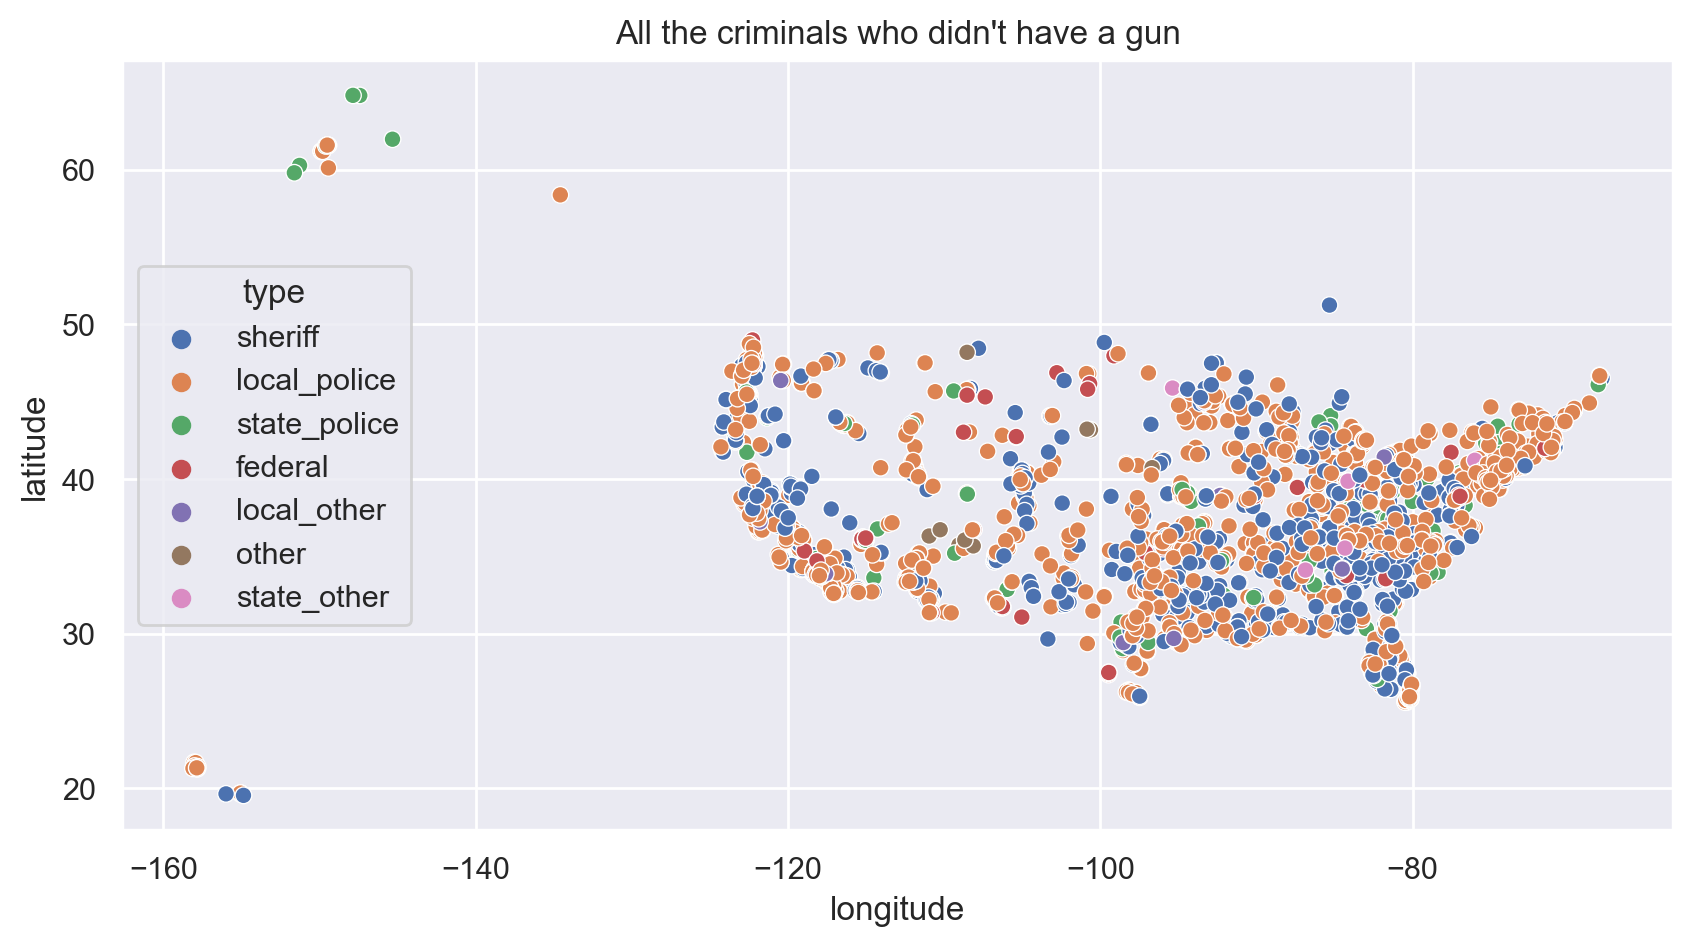

In [385]:
plt.figure(figsize=(10,5), dpi=200)
sns.scatterplot(data=criminals_without_guns, y='latitude',x='longitude', hue='type')
plt.title("All the criminals who didn't have a gun")
plt.show()

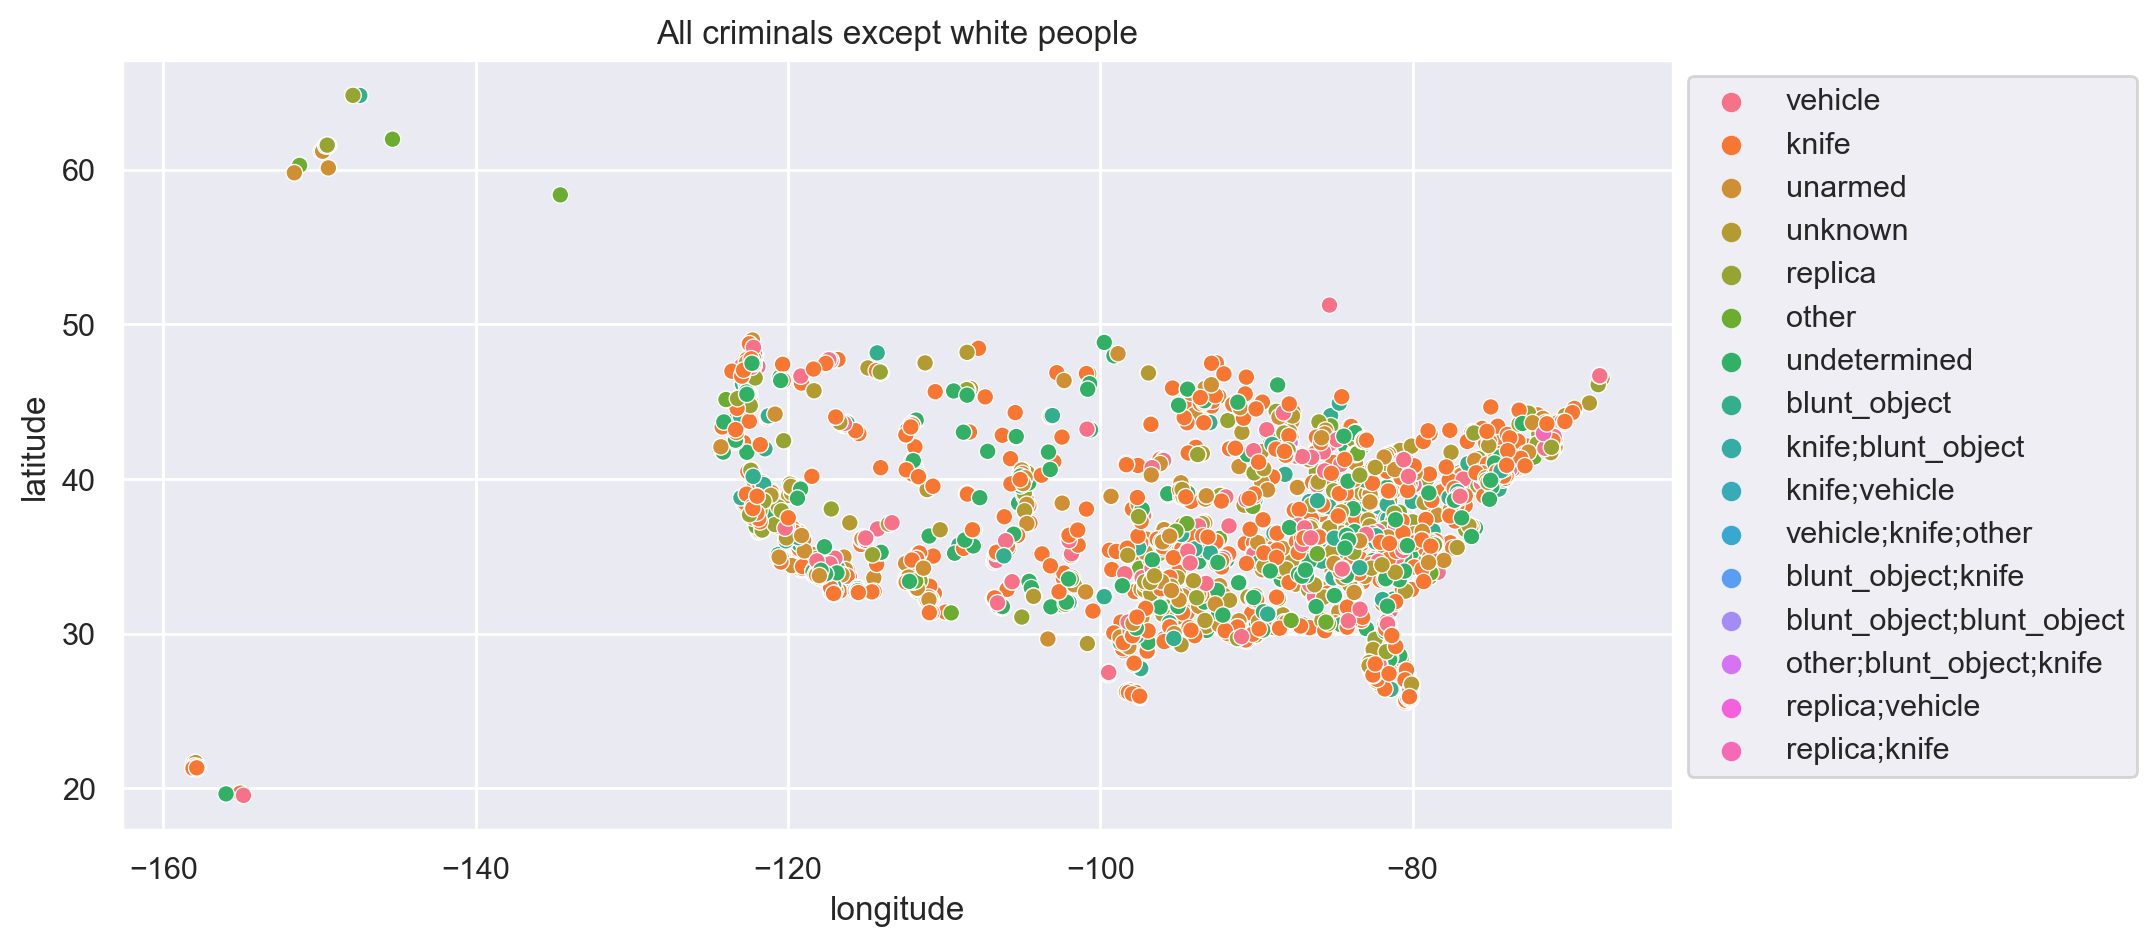

In [384]:
plt.figure(figsize=(10,5), dpi=200)
sns.scatterplot(data=criminals_without_guns, y='latitude',x='longitude', hue='armed_with')
plt.legend(bbox_to_anchor=(1, 1))
plt.title("All criminals except white people")
plt.show()

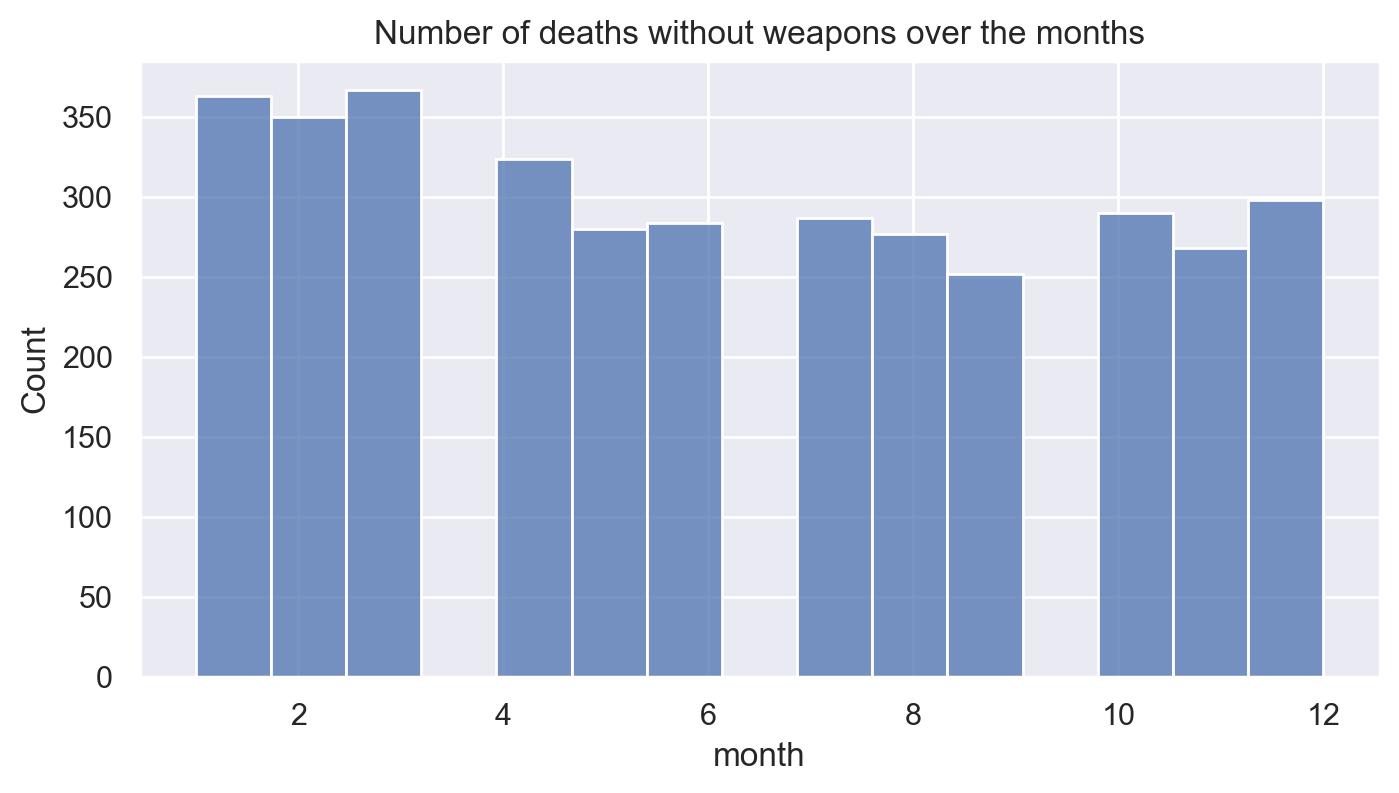

In [382]:
plt.figure(figsize=(8,4), dpi=200)
sns.histplot(data=criminals_without_guns, x='month')
plt.title('Number of deaths without weapons over the months')
plt.show()

In [294]:
criminals_without_guns.state.value_counts()[:10]

CA    690
TX    290
FL    214
AZ    169
GA    124
WA    121
OK    106
CO    104
OH     98
TN     96
Name: state, dtype: int64

In [295]:
state_list = ['CA','TX','FL','AZ','GA','WA','OK','CO','OH','TN']
unarmed_top_10_states = criminals_without_guns[criminals_without_guns.state.isin(state_list)]

In [296]:
mask = (unarmed_top_10_states['armed_with'] == 'knife;vehicle') | (unarmed_top_10_states['armed_with'] == 'blunt_object;blunt_object') | (unarmed_top_10_states['armed_with'] == 'blunt_object;knife')
unarmed_top_10_states = unarmed_top_10_states[~mask]

In [297]:
unarmed_top_10_states.shape

(2007, 24)

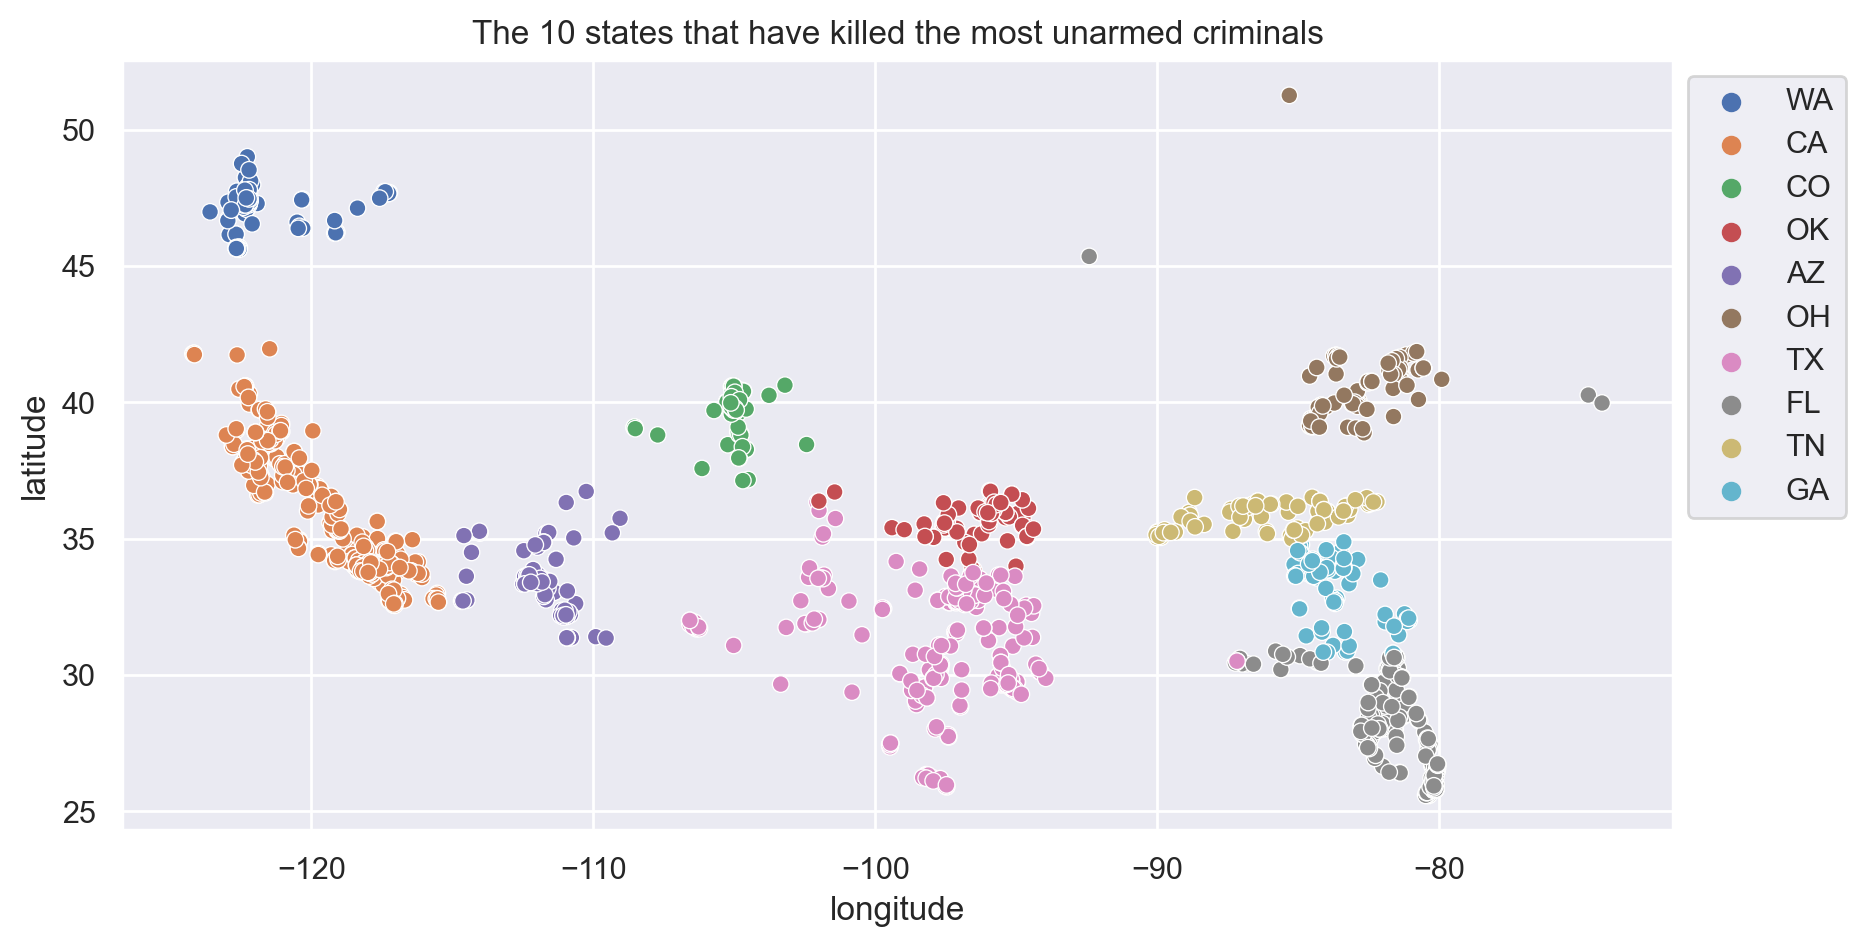

In [380]:
plt.figure(figsize=(10,5), dpi=200)
sns.scatterplot(data=unarmed_top_10_states, y='latitude',x='longitude', hue='state')
plt.legend(bbox_to_anchor=(1, 1))
plt.title('The 10 states that have killed the most unarmed criminals')
plt.show()

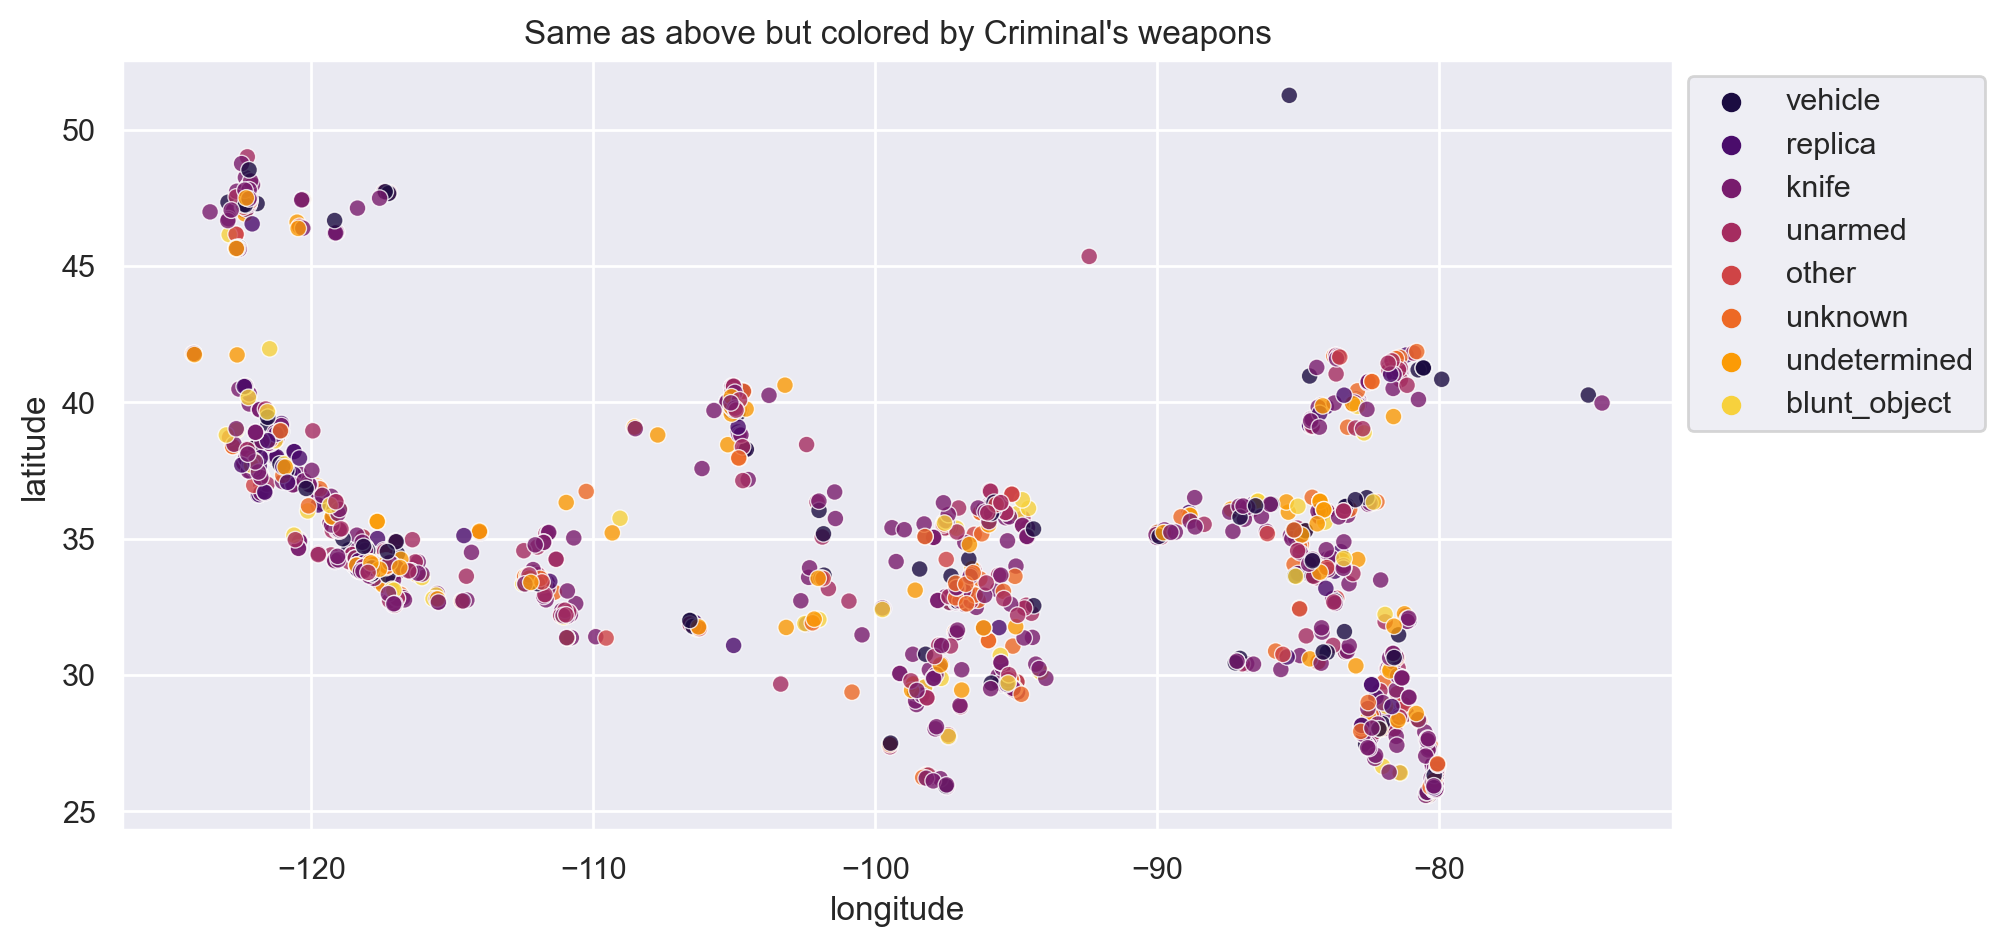

In [381]:
plt.figure(figsize=(10,5), dpi=200)
sns.scatterplot(data=unarmed_top_10_states, y='latitude',x='longitude', hue='armed_with', alpha=.8, color='inferno',palette='inferno')
plt.legend(bbox_to_anchor=(1, 1))
plt.title("Same as above but colored by Criminal's weapons")
plt.show()

In [303]:
unarmed_top_10_states.armed_with.value_counts()

knife           831
unarmed         309
unknown         179
vehicle         175
undetermined    166
replica         158
blunt_object    132
other            57
Name: armed_with, dtype: int64

In [304]:
unarmed_top_10_states.race.value_counts()

W    740
H    485
B    376
A     46
N     23
O      9
Name: race, dtype: int64

In [305]:
# Here we have 3 dataframes containing the top 20 cities where each of these races/ethnicities mostly reside
hispanic_liv_df =  hispanic_liv_df[:15]
black_liv_df =  black_liv_df[:15]
white_liv_df =  white_liv_df[:10]

In [306]:
# we save that part of the dataframe which contains their main states of residence for each race
hispanic_america = merged_df[merged_df.state.isin(hispanic_liv_df.index)]
black_america = merged_df[merged_df.state.isin(black_liv_df.index)]
white_america = merged_df[merged_df.state.isin(white_liv_df.index)]

In [307]:
white_america.race.value_counts('percent')*100

W    69.859515
B    22.222222
H     5.874840
A     1.149425
N     0.893997
Name: race, dtype: float64

In [308]:
black_america.race.value_counts('percent')*100

W    50.720751
B    35.903453
H    12.034864
A     0.972176
O     0.268186
N     0.100570
Name: race, dtype: float64

In [309]:
hispanic_america.race.value_counts('percent')*100

W      43.682213
H      32.022777
B      19.821041
A       2.901302
N       1.165944
O       0.379610
B;H     0.027115
Name: race, dtype: float64

In [310]:
# here we have a marked change from previous results
black_america.type.value_counts()

local_police    1818
sheriff         1262
state_police     190
federal           90
local_other       17
state_other        8
Name: type, dtype: int64

In [311]:
# these seem to be little infamous places or in any case we have a drastic decrease in terms of deaths
white_america.type.value_counts()

local_police    512
sheriff         202
state_police    131
federal          20
state_other       5
local_other       3
other             1
Name: type, dtype: int64

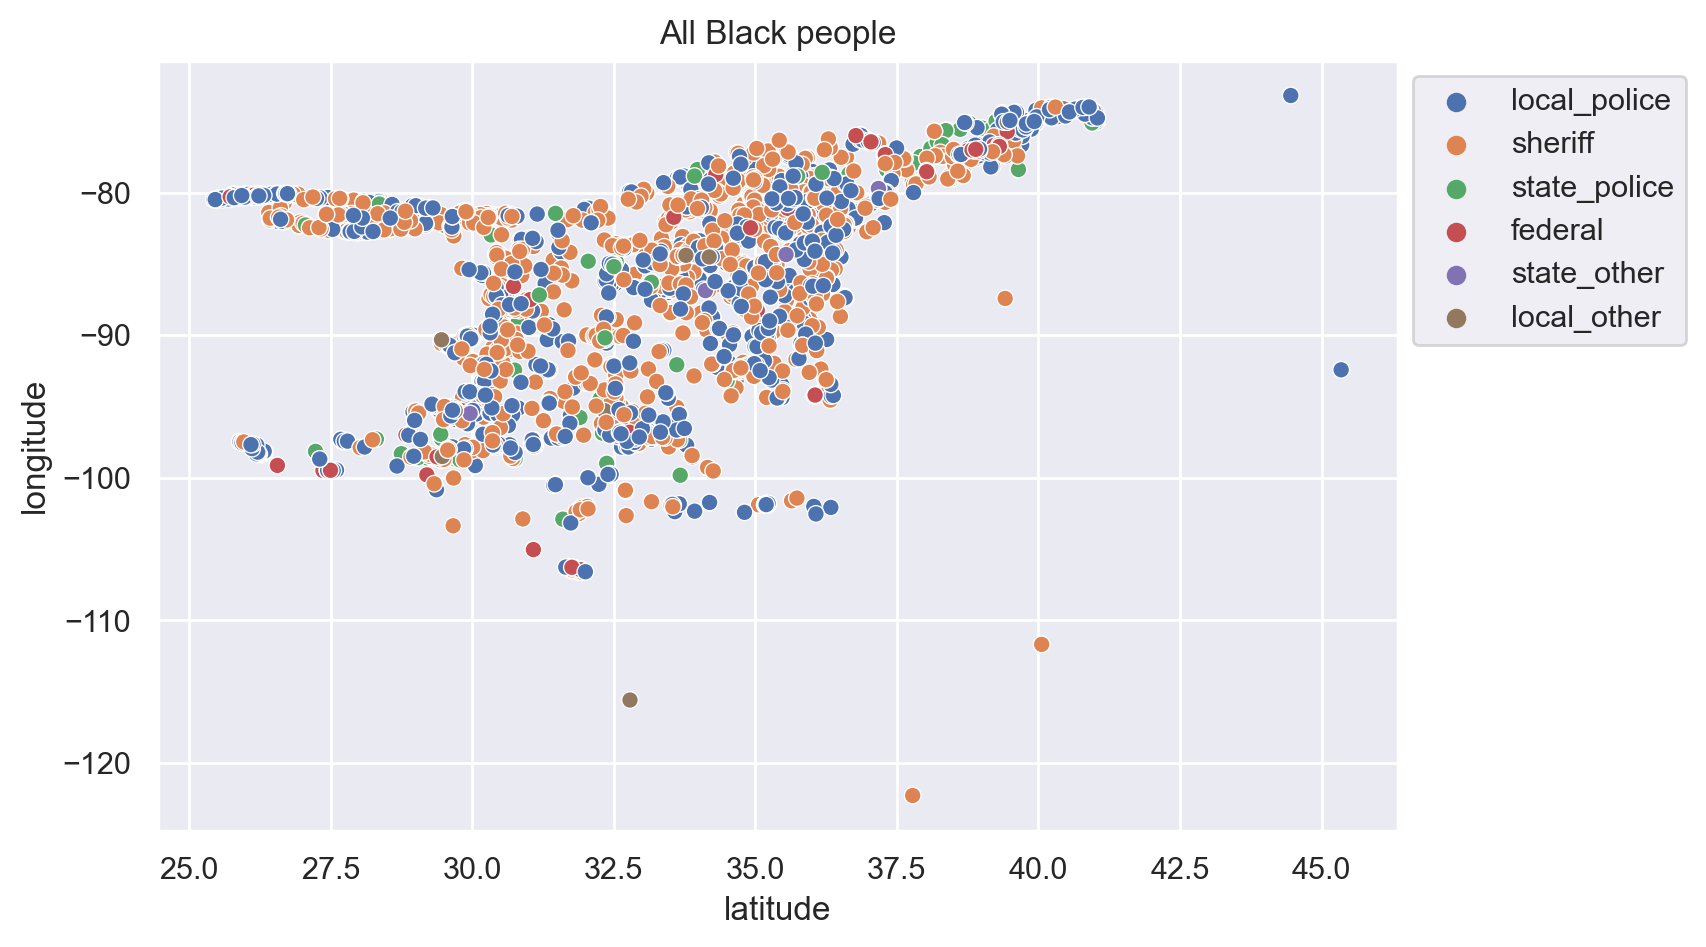

In [377]:
# plot the type of armed force in balck_ameria
plt.figure(figsize=(8,5), dpi=200)
sns.scatterplot(data=black_america, y='longitude', x='latitude',hue='type')
plt.title('All Black people')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

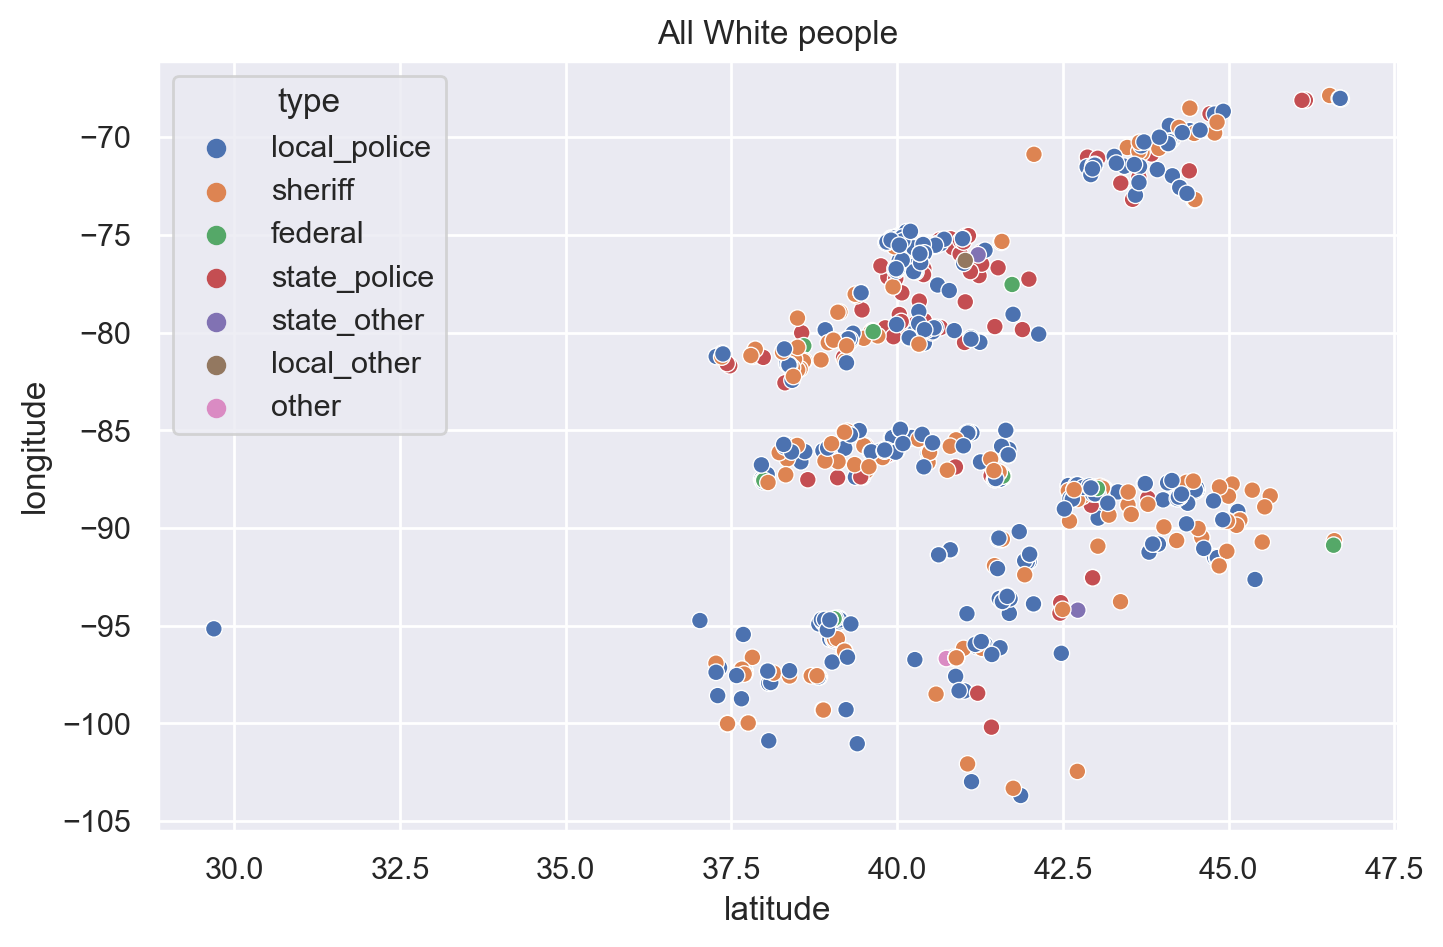

In [375]:
# # plot the type of armed force in white_ameria
plt.figure(figsize=(8,5), dpi=200)
sns.scatterplot(data=white_america, y='longitude',x='latitude',hue='type')
plt.title('All White people')
plt.show()

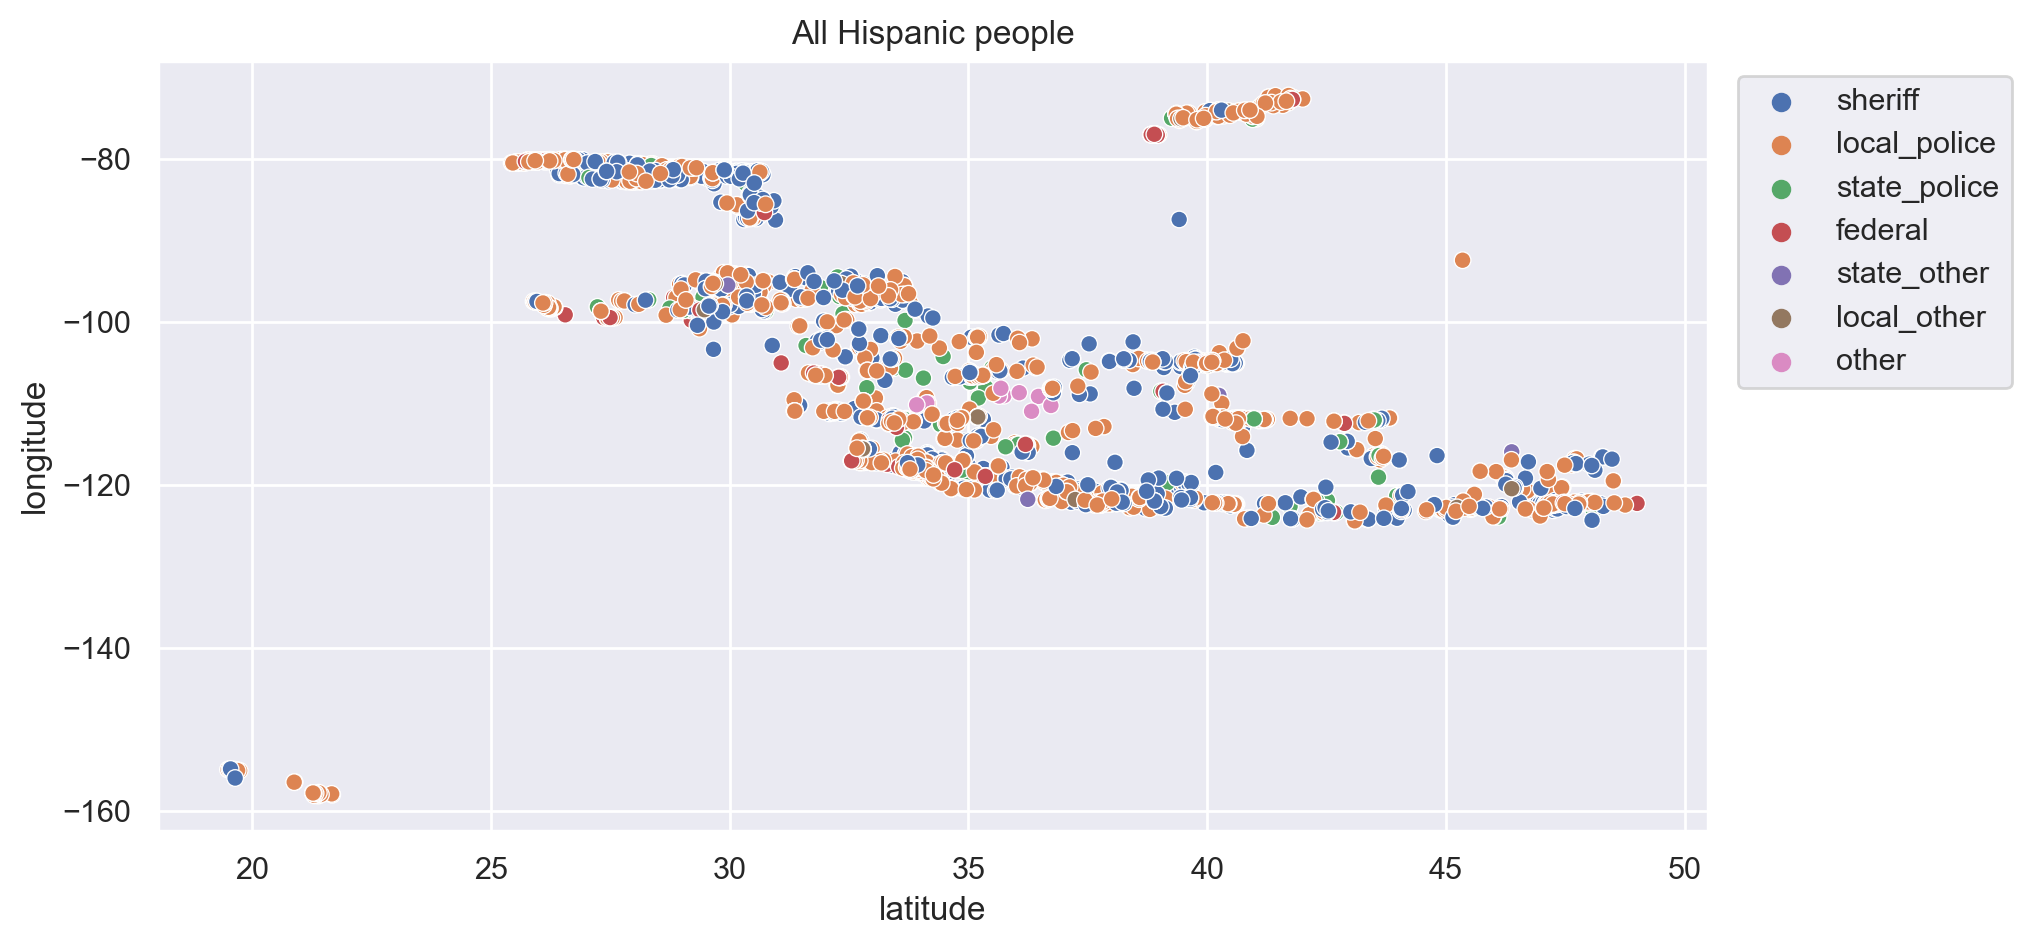

In [374]:
# also the Hispanic_part
plt.figure(figsize=(10,5), dpi=200)
sns.scatterplot(data=hispanic_america, y='longitude',x='latitude',hue='type')
plt.title('All Hispanic people')
plt.legend(bbox_to_anchor=(1.01,1))
plt.show()

### where do the federal forces intervene?

In [319]:
federal_df = merged_df[merged_df.type=='federal']

In [320]:
# 230 cases
federal_df.shape[0]

230

In [321]:
federal_df.head(3)

id_x        date threat_type flee_status armed_with          city  \
79    17  2015-01-06       point         not    replica     Knoxville   
80  2125  2016-12-12       point         not        gun  Philadelphia   
81  3324  2018-01-18       shoot         not        gun    Harrisburg   

          county state   latitude  longitude location_precision  \
79     Allegheny    PA  40.412936 -79.991408      not_available   
80  Philadelphia    PA  40.042198 -75.078931      not_available   
81       Dauphin    PA  40.265128 -76.862129      not_available   

      criminal_name   age gender race   race_source  \
79  Leslie Sapp III  47.0   male    B  undetermined   
80  Kenneth Robledo  28.0   male    B  undetermined   
81    Kevin Sturgis  31.0   male    B  undetermined   

    was_mental_illness_related  body_camera  agency_ids  \
79                       False        False        1567   
80                       False        False        1567   
81                       False        False        1567   

           department_name     type  total_shootings  year  month  
79  U.S. Marshal's Service  federal                5  2015      1  
80  U.S. Marshal's Service  federal                5  2016     12  
81  U.S. Marshal's Service  federal                5  2018      1

In [322]:
# the departments most involved
federal_df.department_name.value_counts()[:8]

U.S. Marshals Service                        104
Federal Bureau of Investigation               29
U.S. Border Patrol                            23
Bureau of Indian Affairs Police                6
U.S. Marshal's Service                         5
U.S. Marshals Service Task Force               5
U.S. Marshals Service Fugitive Task Force      5
U.S. Immigration and Customs Enforcement       4
Name: department_name, dtype: int64

In [323]:
federal_df.state.value_counts()[:15]

TX    31
AZ    17
CA    15
NM    11
VA     9
MO     7
FL     7
PA     7
TN     7
OH     7
MT     7
LA     6
IL     6
GA     6
NC     5
Name: state, dtype: int64

In [324]:
federal_states = federal_df.state.value_counts()[:15]
federal_department = federal_df.department_name.value_counts()[:8]

In [325]:
# under which cases of weapons they intervene more
federal_df.armed_with.value_counts()

gun              140
undetermined      28
unarmed           17
knife             17
vehicle           10
unknown            5
replica            4
blunt_object       3
knife;vehicle      2
gun;vehicle        2
vehicle;gun        1
other              1
Name: armed_with, dtype: int64

In [326]:
# let's see years distribution
federal_df.year.value_counts()

2021    41
2022    36
2015    34
2020    29
2019    28
2018    23
2016    21
2017    10
2023     8
Name: year, dtype: int64

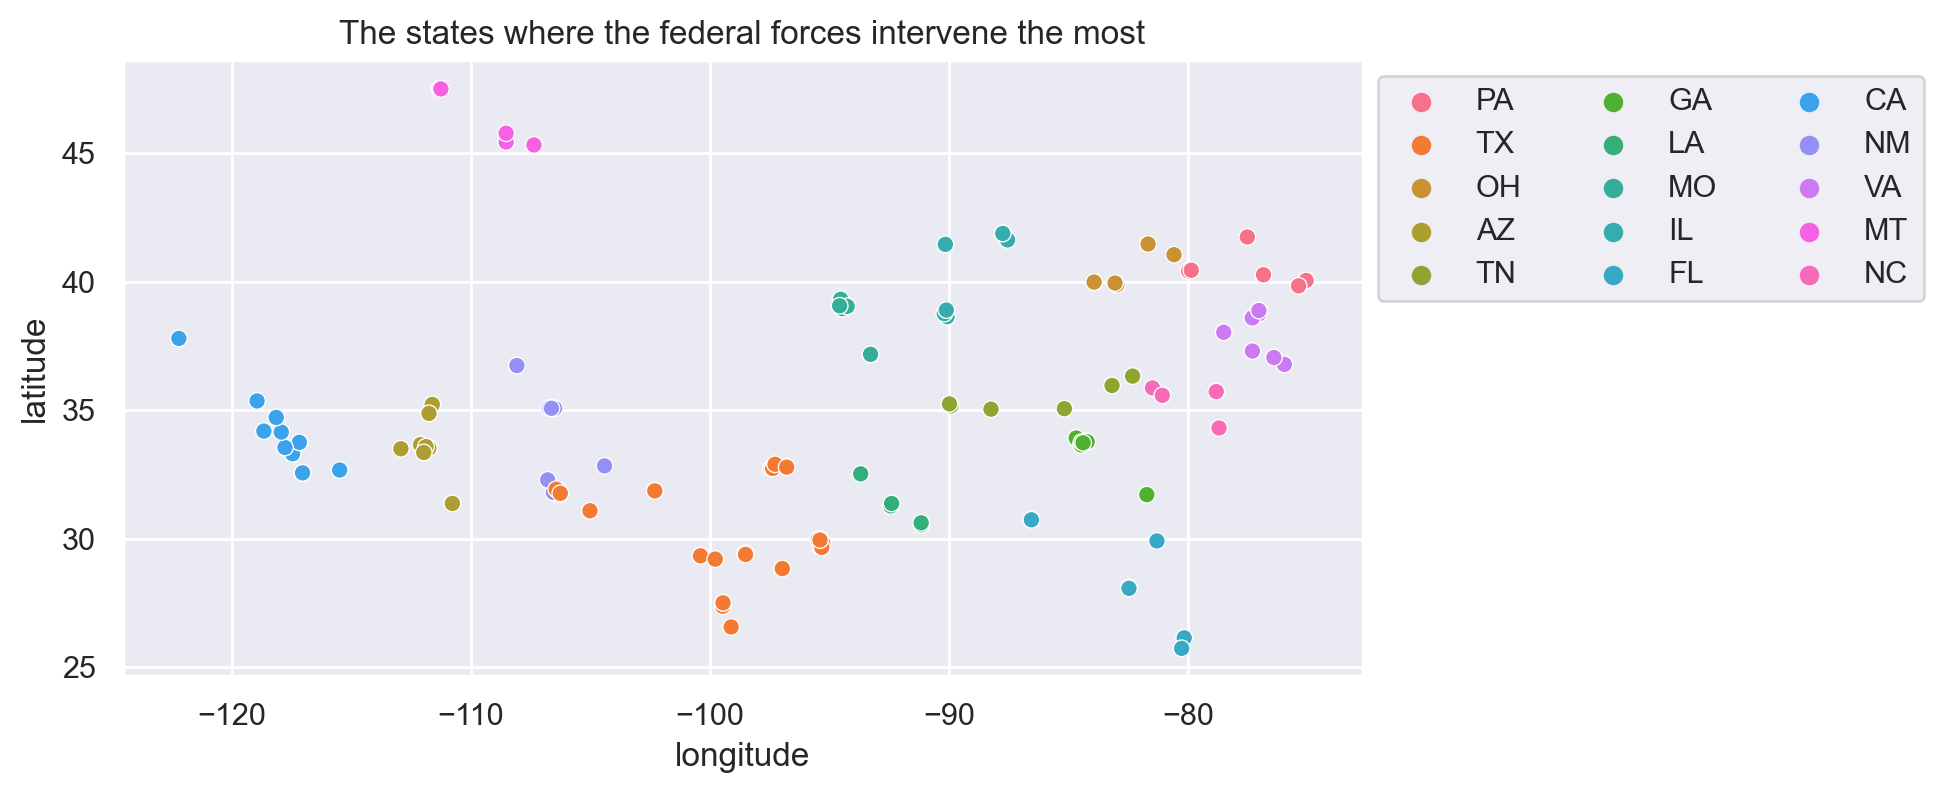

In [373]:
plt.figure(figsize=(8,4), dpi=200)
sns.scatterplot(data=federal_df[federal_df.state.isin(federal_states.index)], x='longitude',y='latitude', hue='state')
plt.legend(ncol=3, bbox_to_anchor=(1,1))
plt.title('The states where the federal forces intervene the most')
plt.show()

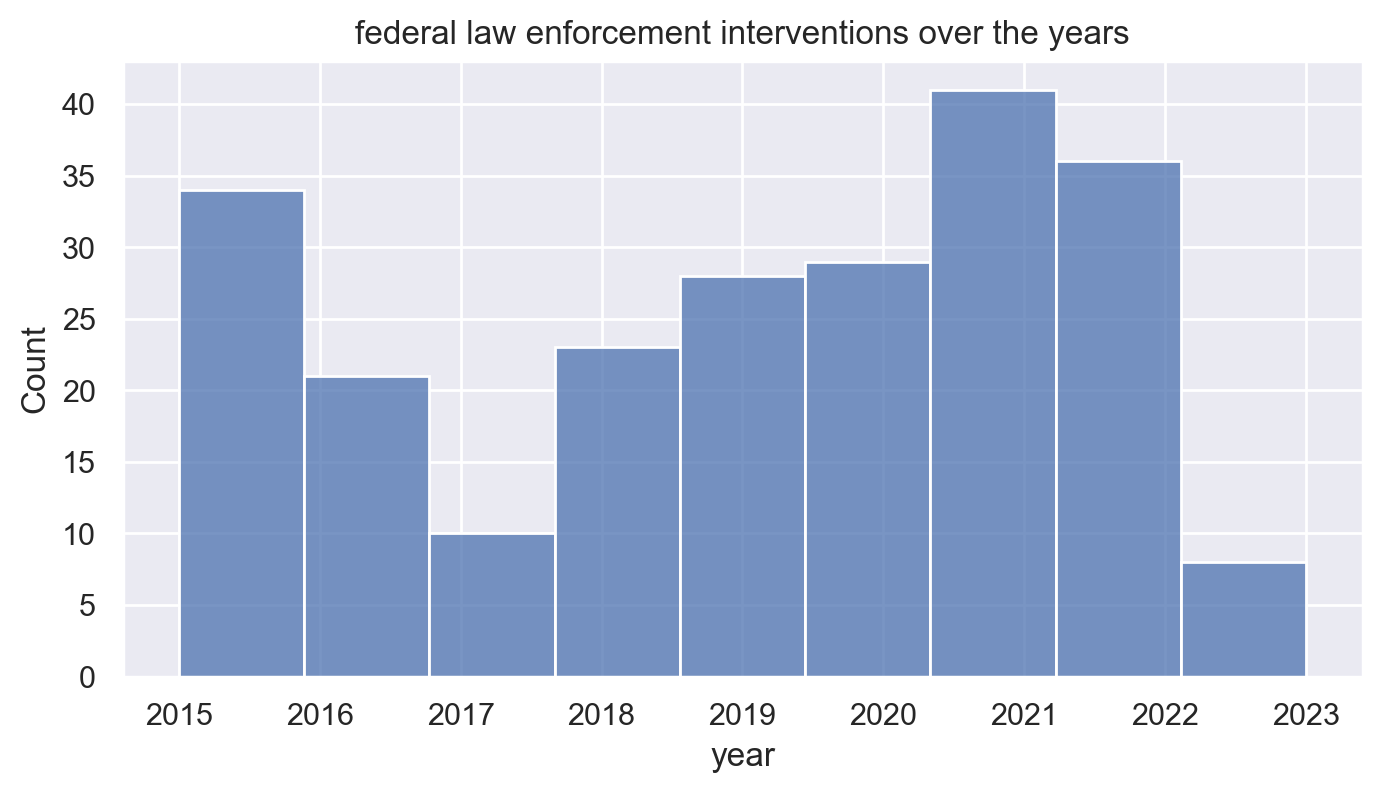

In [370]:
plt.figure(figsize=(8,4), dpi=200)
sns.histplot(data=federal_df,x='year')
plt.title("federal law enforcement interventions over the years")
plt.show()

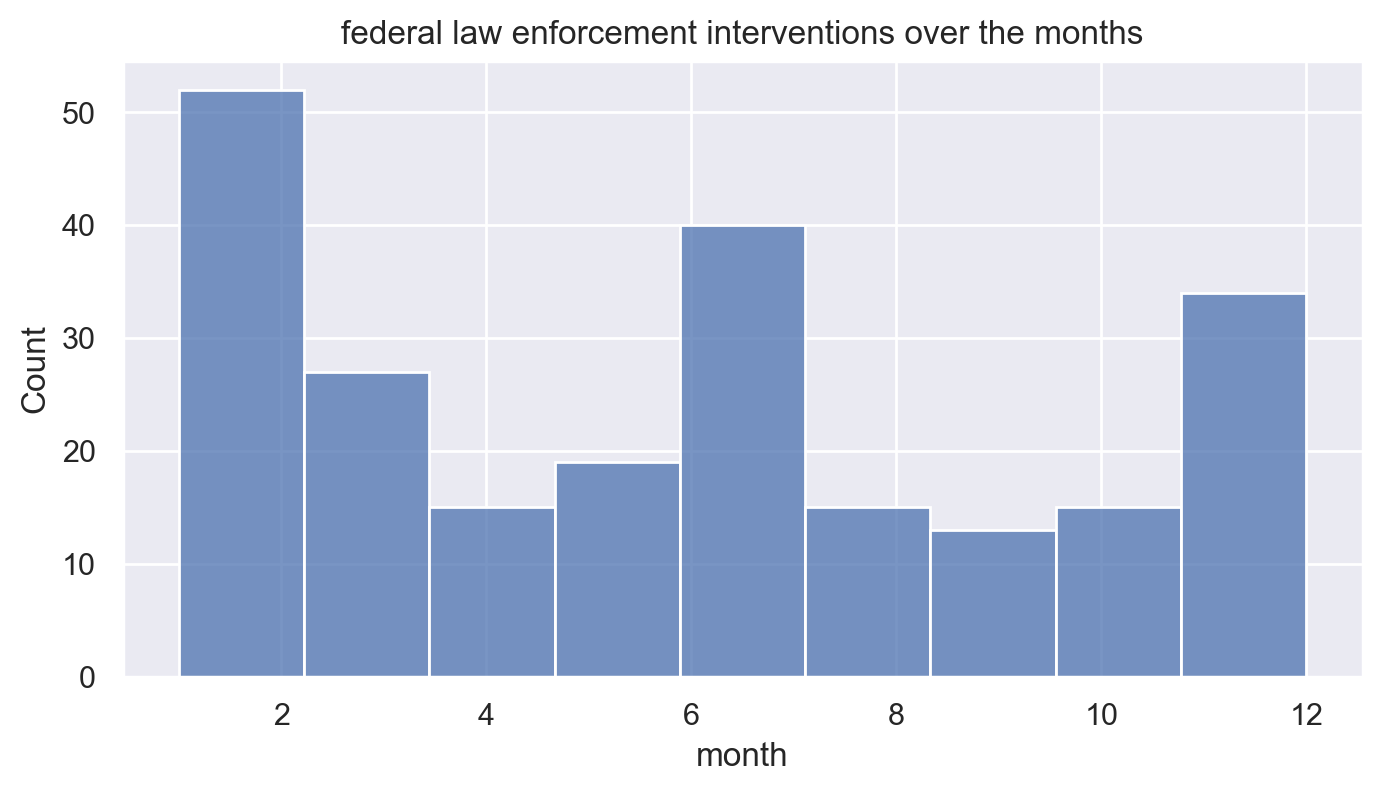

In [368]:
plt.figure(figsize=(8,4), dpi=200)
sns.histplot(data=federal_df,x='month')
plt.title("federal law enforcement interventions over the months")
plt.show()

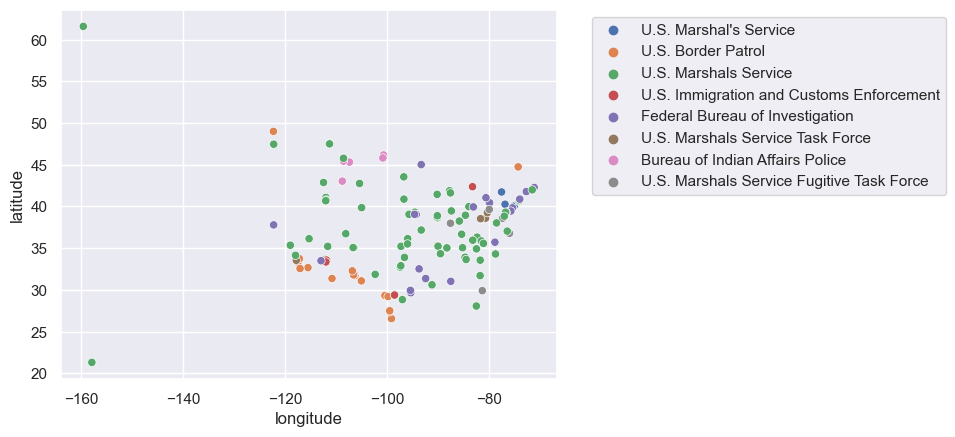

In [367]:
sns.scatterplot(data=federal_df[federal_df.department_name.isin(federal_department.index)], 
                                x='longitude', y='latitude', hue='department_name')
plt.legend(bbox_to_anchor=(.8,.6,1,.4))
plt.show("Federal Departments interventions")

### California

In [331]:
california = merged_df[merged_df.state == 'CA']

In [332]:
california.head()

id_x        date threat_type flee_status armed_with           city  \
21     8  2015-01-04       point         not    replica  San Francisco   
22   182  2015-02-26      threat         not      knife  San Francisco   
23   221  2015-03-17      threat         not    vehicle  San Francisco   
24   922  2015-10-15       point         not        gun  San Francisco   
25   998  2015-11-11       point         not        gun  San Francisco   

           county state   latitude   longitude location_precision  \
21  San Francisco    CA  37.762910 -122.422001      not_available   
22  San Francisco    CA  37.750904 -122.413943      not_available   
23  San Francisco    CA  37.789426 -122.422157      not_available   
24  San Francisco    CA  37.778723 -122.414780      not_available   
25  San Francisco    CA  37.748111 -122.420826      not_available   

          criminal_name   age  gender race   race_source  \
21      Matthew Hoffman  32.0    male    W  undetermined   
22  Amilcar Perez-Lopez  21.0    male    H  undetermined   
23          Alice Brown  24.0  female    W  undetermined   
24      Herbert Benitez  27.0    male    H  undetermined   
25  Javier Lopez Garcia  25.0    male    H  undetermined   

    was_mental_illness_related  body_camera  agency_ids  \
21                        True        False         196   
22                       False        False         196   
23                        True        False         196   
24                       False        False         196   
25                       False        False         196   

                    department_name          type  total_shootings  year  \
21  San Francisco Police Department  local_police               19  2015   
22  San Francisco Police Department  local_police               19  2015   
23  San Francisco Police Department  local_police               19  2015   
24  San Francisco Police Department  local_police               19  2015   
25  San Francisco Police Department  local_police               19  2015   

    month  
21      1  
22      2  
23      3  
24     10  
25     11

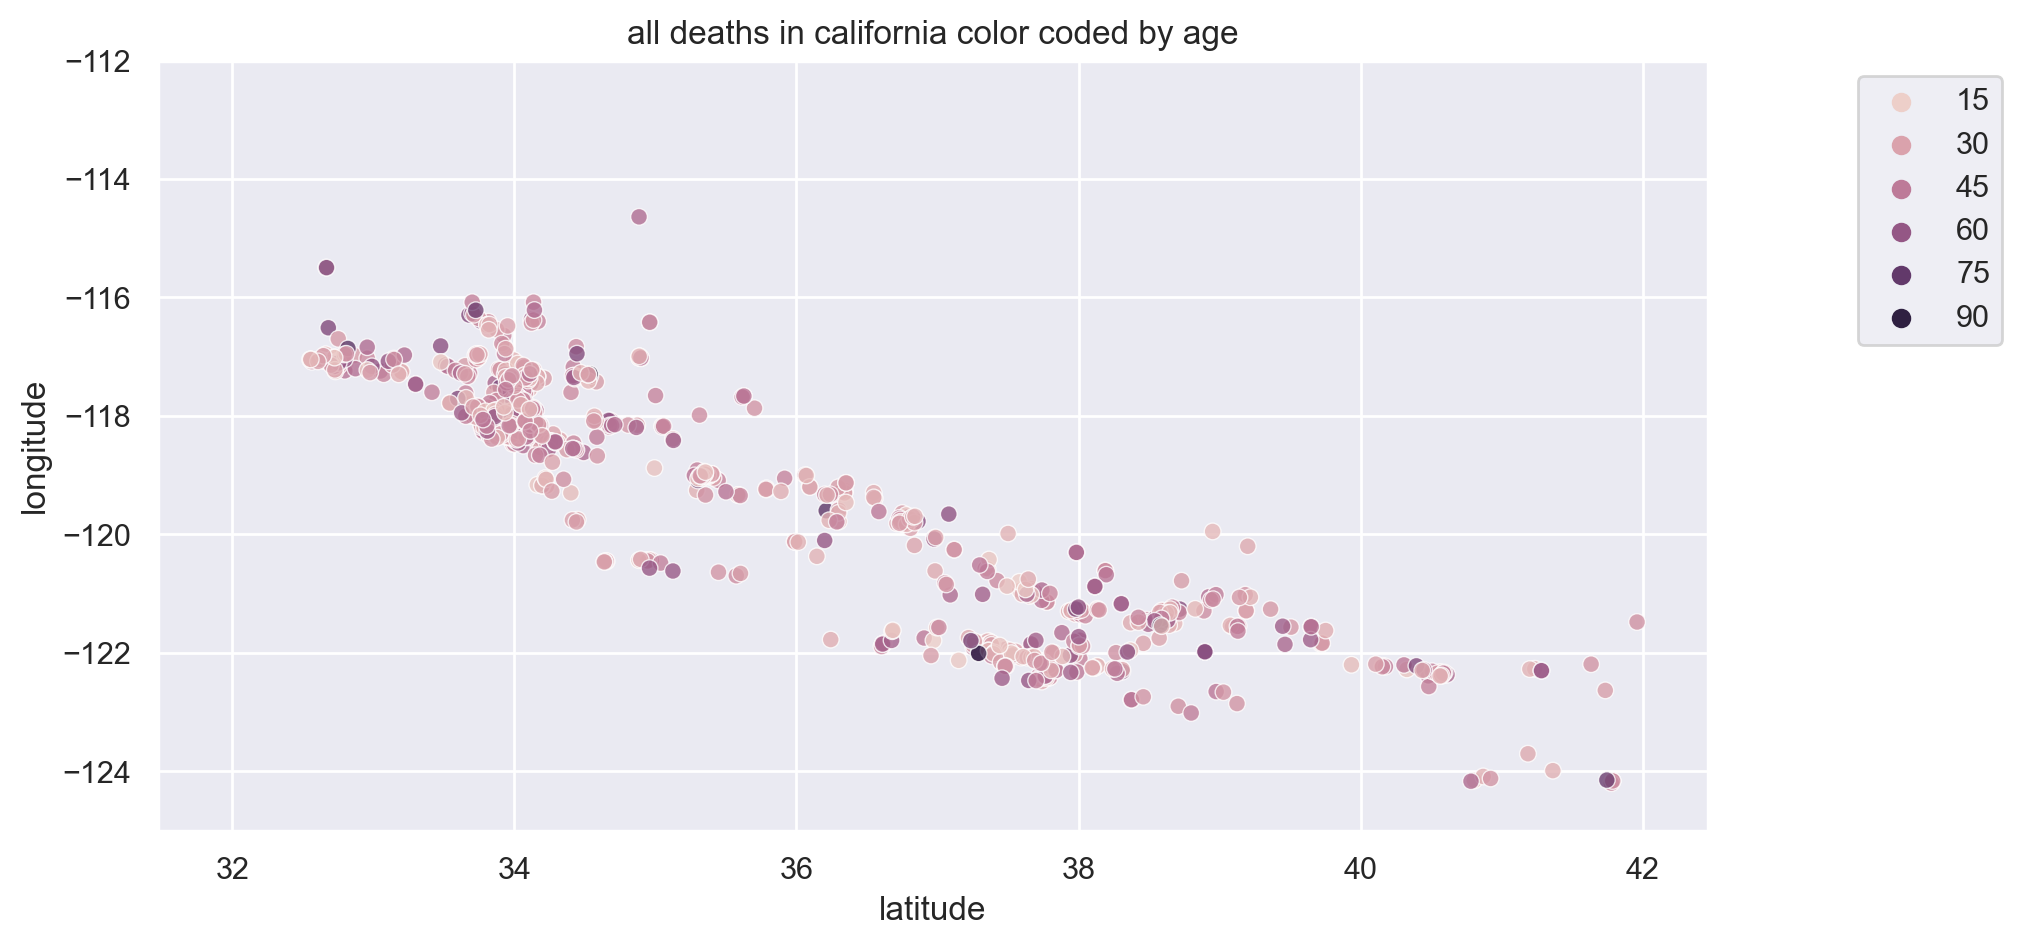

In [365]:
# I check the age of the agent in question to assess the degree of experience in the field
plt.figure(figsize=(10,5), dpi=200)
sns.scatterplot(data=california, x='latitude',y='longitude', hue='age', alpha=.8)
plt.ylim(-125,-112)
plt.legend(bbox_to_anchor=(.2, .5, 1, .5))
plt.title("all deaths in california color coded by age")
plt.show()

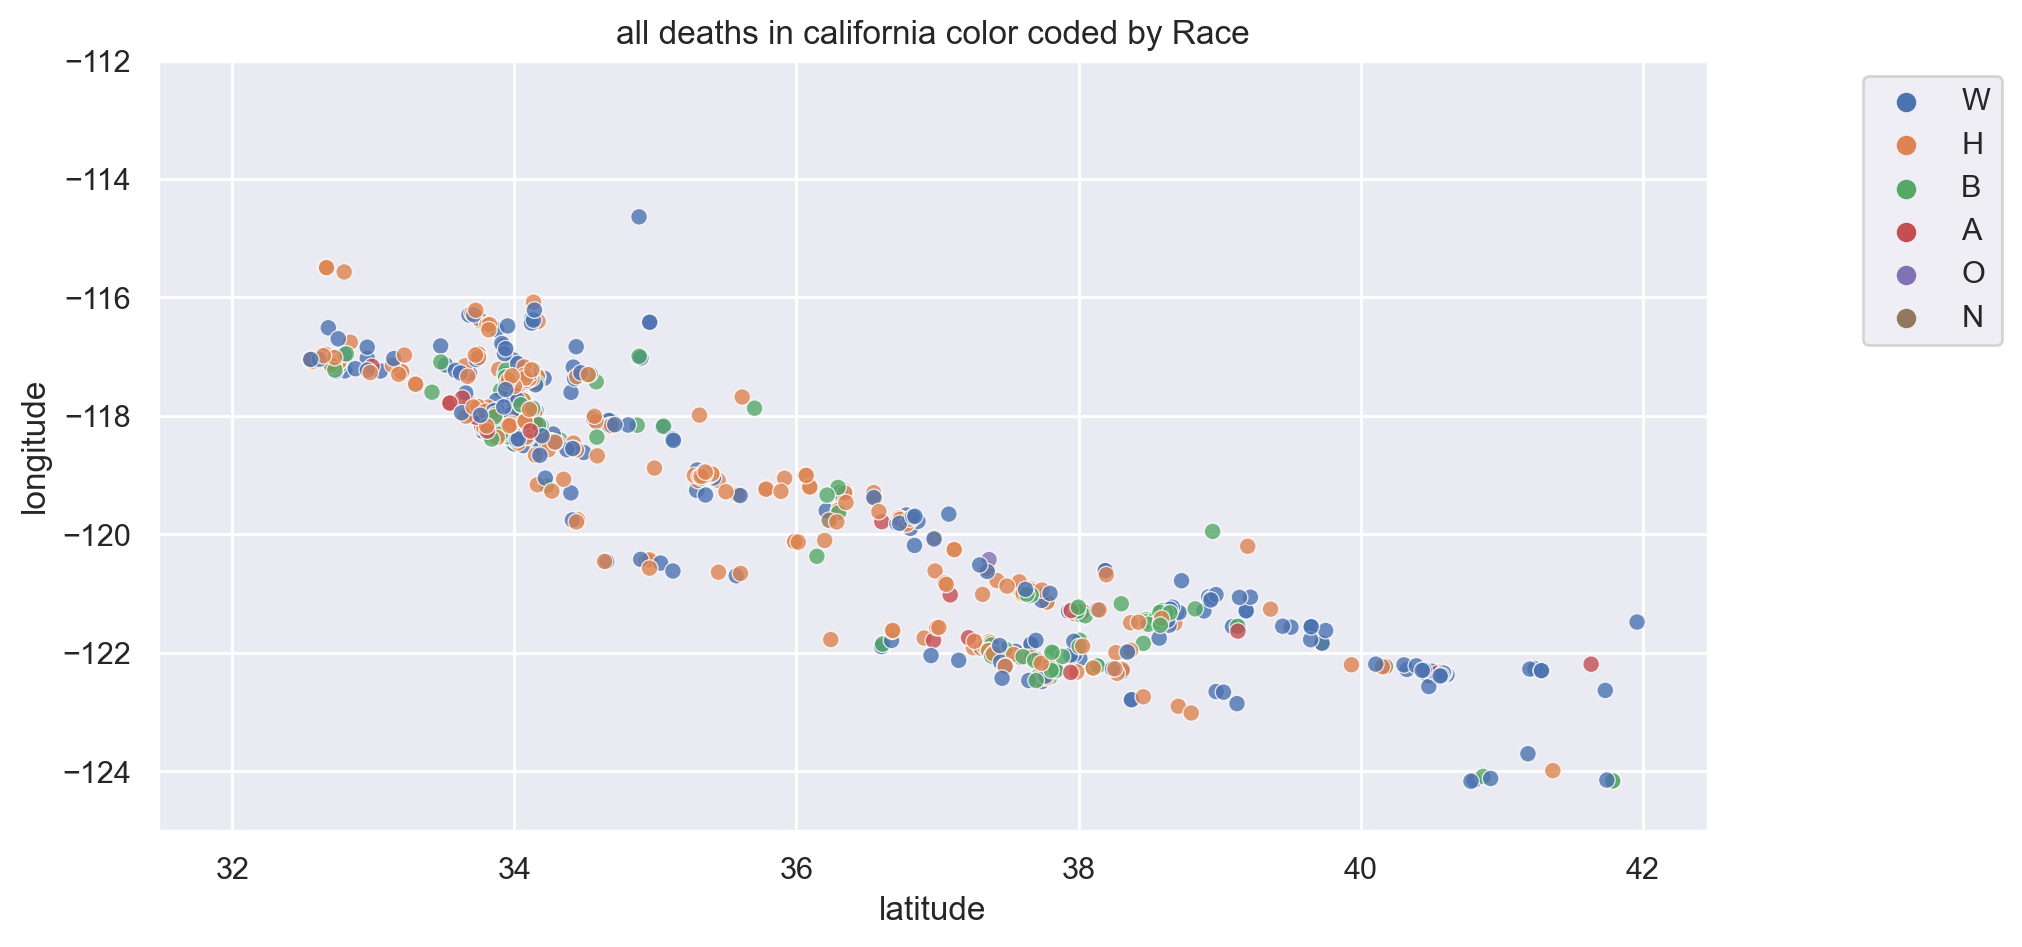

In [364]:
plt.figure(figsize=(10,5), dpi=200)
sns.scatterplot(data=california, x='latitude',y='longitude', hue='race', alpha=.8)
plt.ylim(-125,-112)
plt.legend(bbox_to_anchor=(.2, .5, 1, .5))
plt.title("all deaths in california color coded by Race")
plt.show()

In [335]:
california.type.value_counts()[:15]

local_police    786
sheriff         386
state_police     53
federal          15
local_other       8
state_other       3
Name: type, dtype: int64

In [336]:
california.city.value_counts()[:15]

Los Angeles       138
Bakersfield        37
Fresno             31
San Diego          30
San Bernardino     25
San Jose           25
Long Beach         23
Sacramento         23
San Francisco      20
Stockton           18
Redding            14
Anaheim            14
Hemet              14
Santa Ana          13
Modesto            13
Name: city, dtype: int64

In [337]:
california.armed_with.value_counts()

gun                          543
knife                        297
unarmed                       93
replica                       76
blunt_object                  67
undetermined                  53
vehicle                       47
unknown                       43
other                         12
gun;knife                     12
gun;vehicle                    3
vehicle;gun                    3
knife;vehicle                  1
blunt_object;blunt_object      1
Name: armed_with, dtype: int64

In [338]:
california_hist = california[~california['armed_with'].isin(armed_drop_list)]

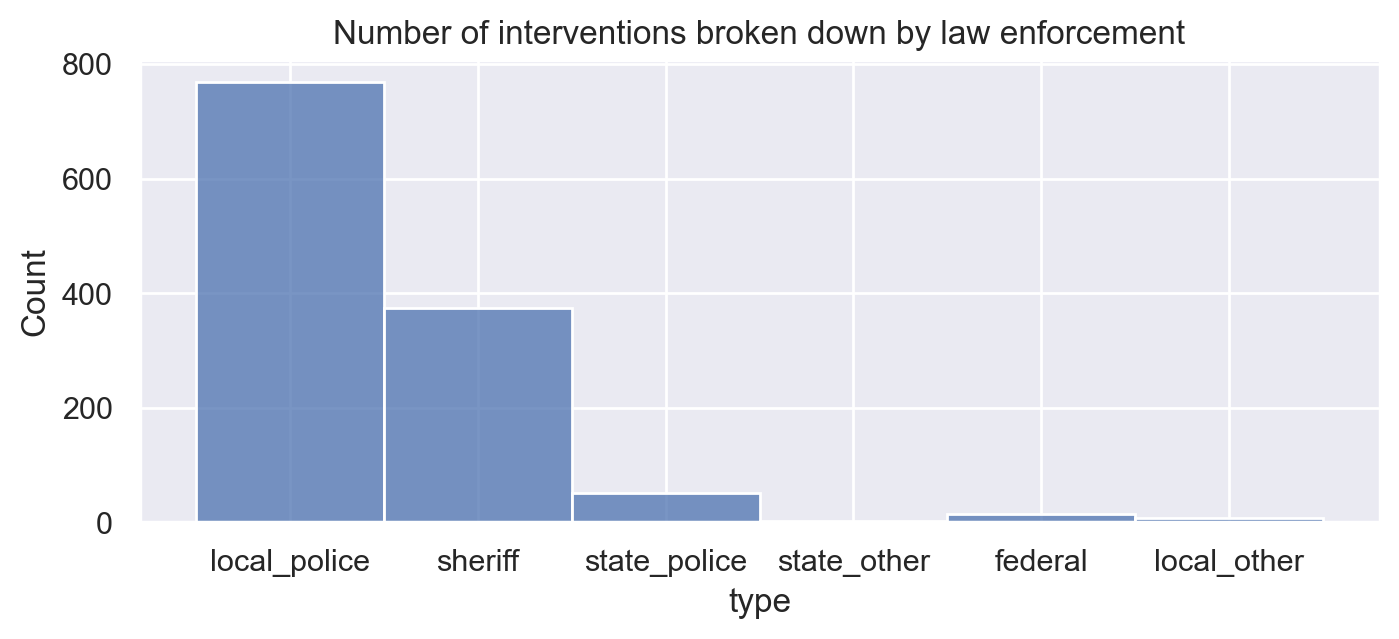

In [342]:
plt.figure(figsize=(8,3), dpi=200)
sns.histplot(data=california_hist, x='type')
plt.title('Number of interventions broken down by law enforcement')
plt.show()

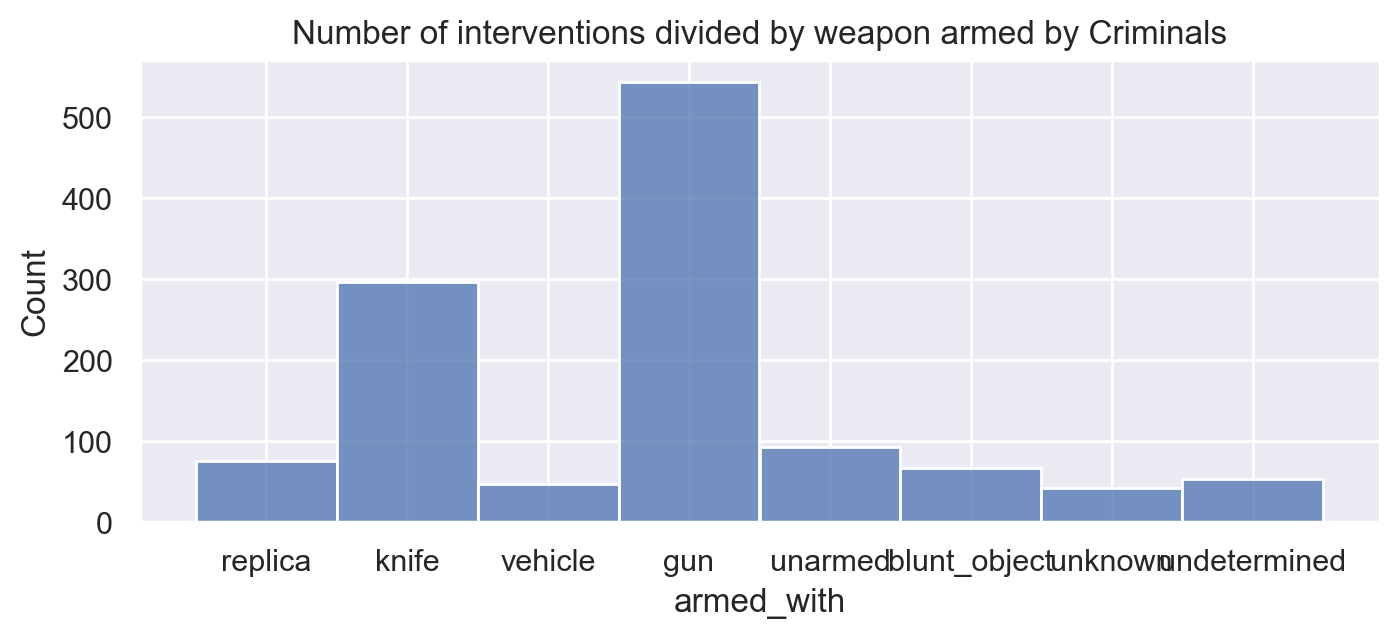

In [343]:
plt.figure(figsize=(8,3), dpi=200)
sns.histplot(data=california_hist, x='armed_with')
plt.title('Number of interventions divided by weapon armed by Criminals')
plt.show()

### Texas

In [344]:
texas = merged_df[merged_df.state == 'TX']

In [345]:
texas.head()

id_x        date   threat_type flee_status    armed_with      city  \
99     21  2015-01-07         point         not           gun  Freeport   
175   325  2015-01-09         point         not           gun   El Paso   
176   424  2015-04-30        threat         not  blunt_object   El Paso   
177   469  2015-05-21  undetermined         not           gun   El Paso   
178   737  2015-08-06         shoot         car           gun   El Paso   

       county state   latitude   longitude location_precision  \
99   Brazoria    TX  28.954889  -95.368801      not_available   
175   El Paso    TX  31.857692 -106.438816      not_available   
176   El Paso    TX  31.694173 -106.342258      not_available   
177   El Paso    TX  31.903775 -106.422942      not_available   
178   El Paso    TX  31.812637 -106.444402      not_available   

               criminal_name   age gender race   race_source  \
99                 Ron Sneed  31.0   male    B  undetermined   
175            Andy Martinez  33.0   male    H  undetermined   
176   Erick Emmanuel Sanchez  22.0   male    H  undetermined   
177  David Alejandro Gandara  22.0   male    H  undetermined   
178          Charles Bertram  22.0   male    B  undetermined   

     was_mental_illness_related  body_camera  agency_ids  \
99                        False        False         246   
175                       False        False         110   
176                       False        False         110   
177                        True        False         110   
178                       False        False         110   

                department_name          type  total_shootings  year  month  
99   Freeport Police Department  local_police                1  2015      1  
175   El Paso Police Department  local_police               15  2015      1  
176   El Paso Police Department  local_police               15  2015      4  
177   El Paso Police Department  local_police               15  2015      5  
178   El Paso Police Department  local_police               15  2015      8

In [346]:
# departments most involved
texas.type.value_counts()

local_police    561
sheriff         170
state_police     56
federal          31
local_other       6
state_other       1
Name: type, dtype: int64

In [347]:
# the cities with the highest incidence in the database
texas.city.value_counts()[:12]

Houston           102
San Antonio        71
Austin             37
Fort Worth         29
Dallas             23
El Paso            23
Amarillo           16
Harris County      15
Corpus Christi     13
Arlington          13
Odessa             12
Midland             8
Name: city, dtype: int64

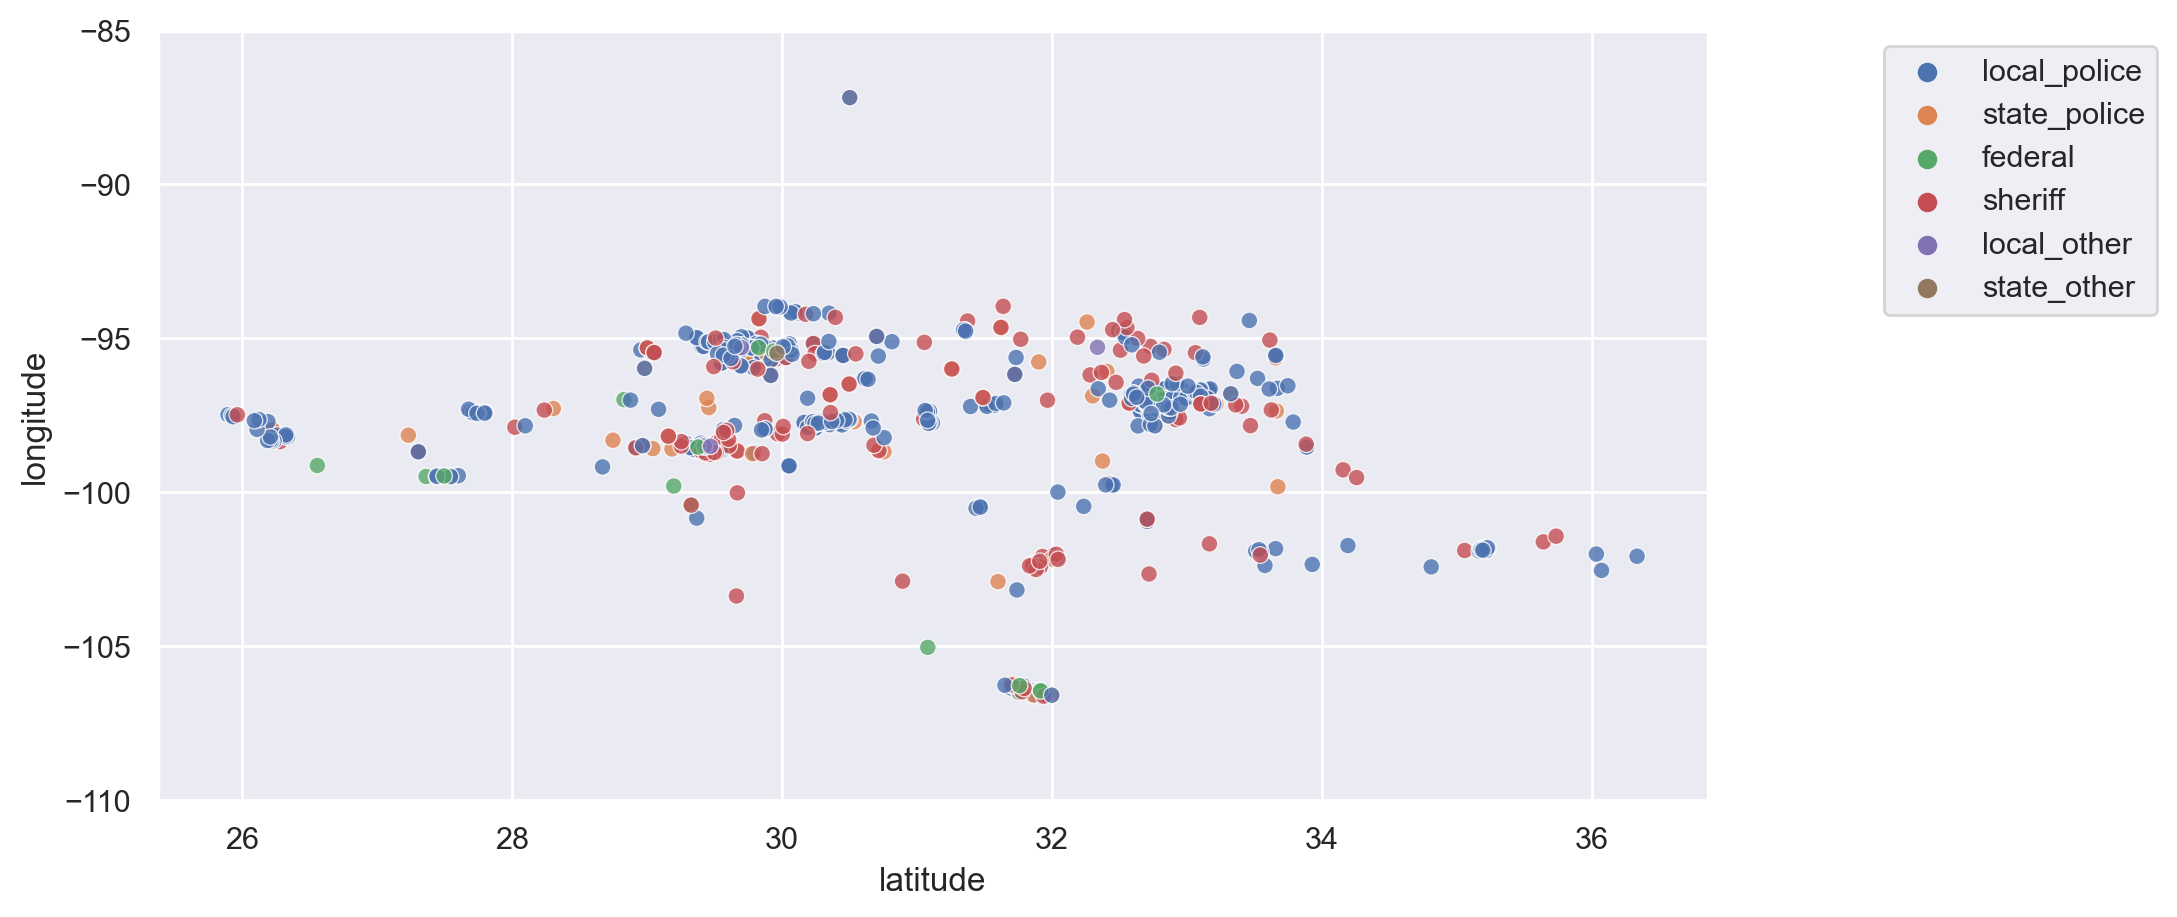

In [363]:
plt.figure(figsize=(10,5), dpi=200)
sns.scatterplot(data=texas, x='latitude',y='longitude', hue='type', alpha=.8)
plt.ylim(-110,-85)
plt.legend(bbox_to_anchor=(.3, .5, 1, .5))

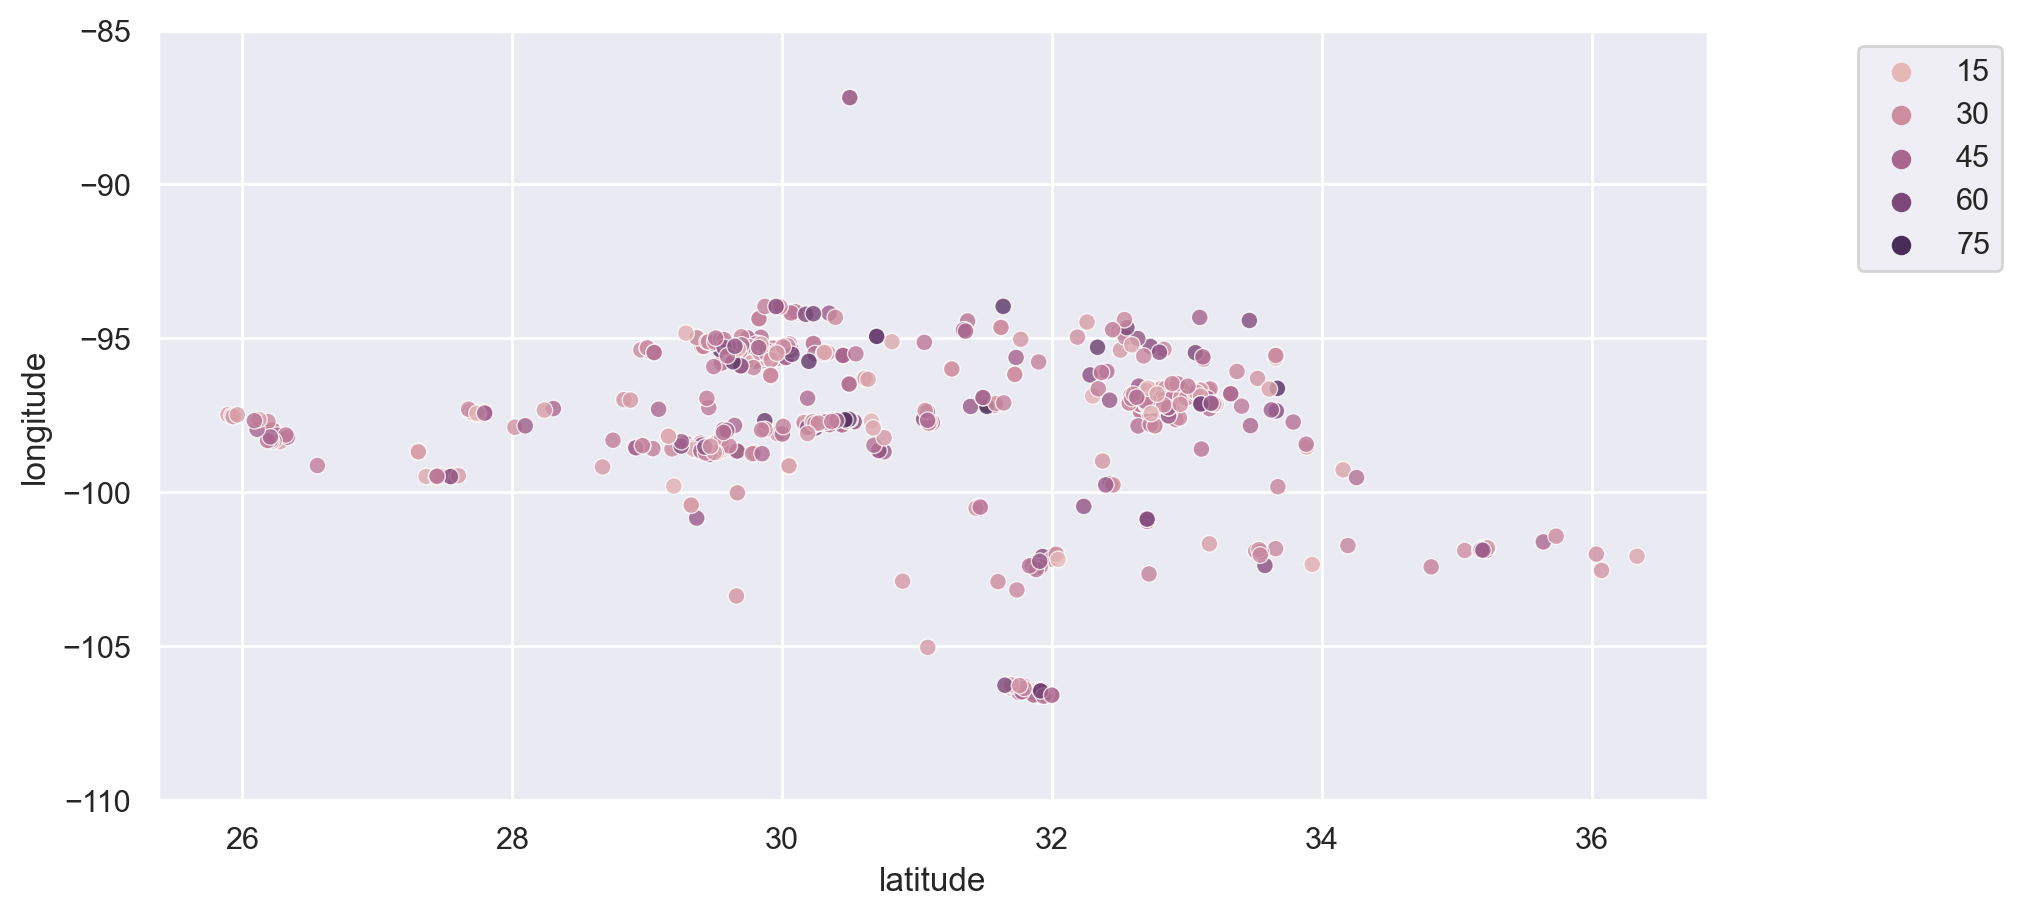

In [362]:
# I check the age of the agent in question to assess the degree of experience in the field
plt.figure(figsize=(10,5), dpi=200)
sns.scatterplot(data=texas, x='latitude',y='longitude', hue='age', alpha=.8)
plt.ylim(-110,-85)
plt.legend(bbox_to_anchor=(.2, .5, 1, .5))

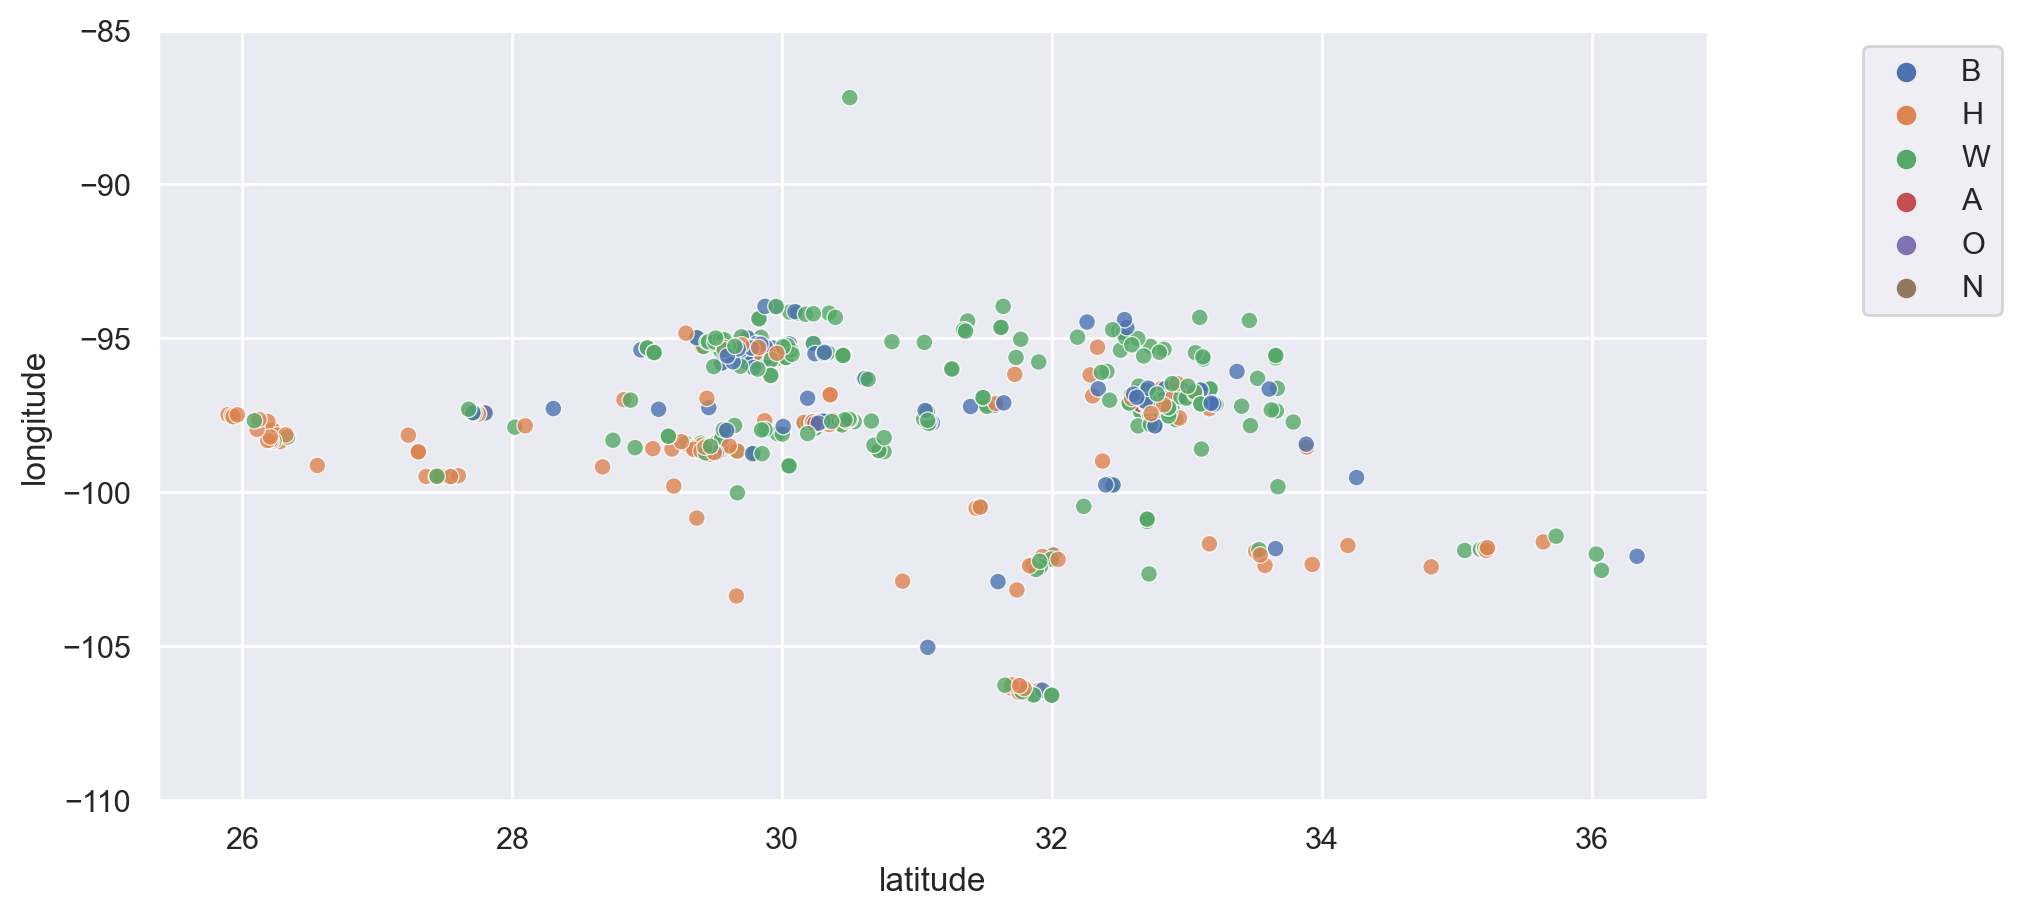

In [361]:
plt.figure(figsize=(10,5), dpi=200)
sns.scatterplot(data=texas, x='latitude',y='longitude', hue='race', alpha=.8)
plt.ylim(-110,-85)
plt.legend(bbox_to_anchor=(.2, .5, 1, .5))

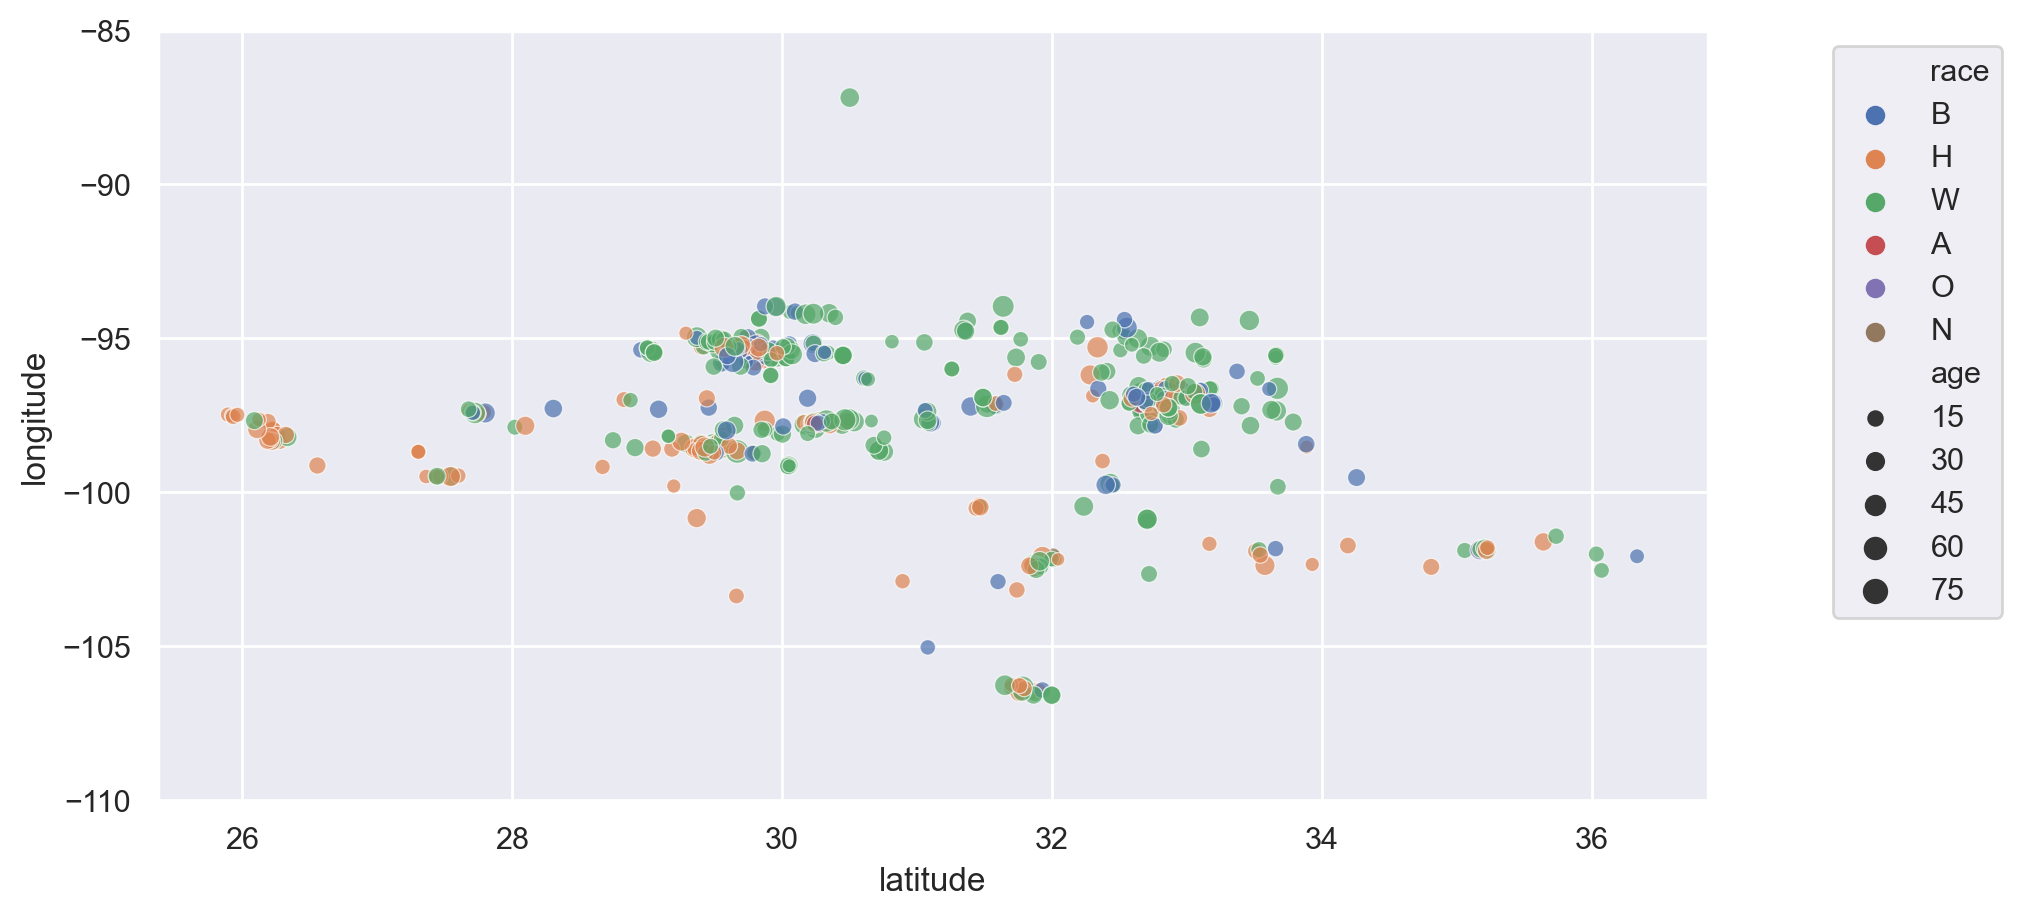

In [360]:
plt.figure(figsize=(10,5), dpi=200)
sns.scatterplot(data=texas, x='latitude',y='longitude', hue='race',size='age', alpha=.7)
plt.ylim(-110,-85)
plt.legend(bbox_to_anchor=(.2, .5, 1, .5))

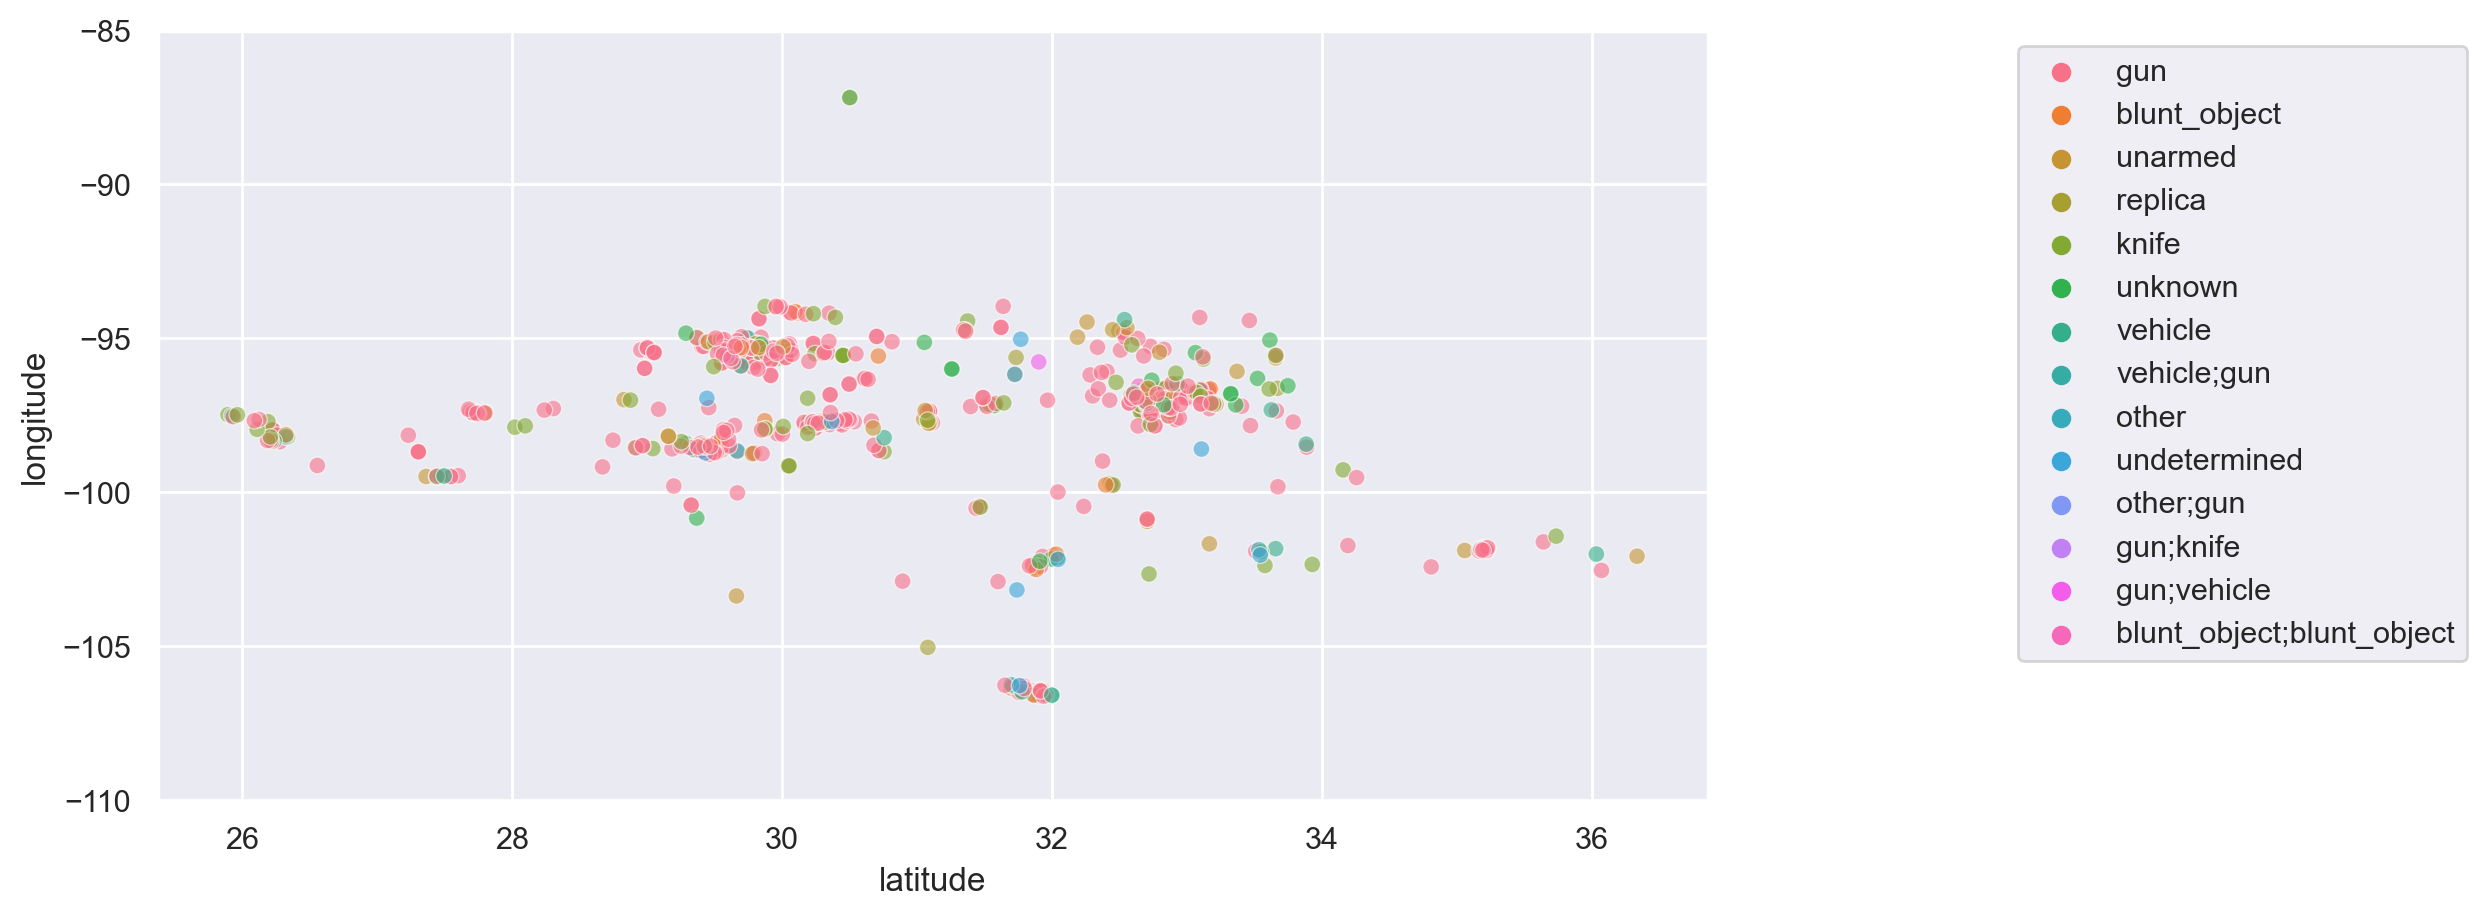

In [359]:
plt.figure(figsize=(10,5), dpi=200)
sns.scatterplot(data=texas, x='latitude',y='longitude', hue='armed_with', alpha=.6)
plt.ylim(-110,-85)
plt.legend(bbox_to_anchor=(.5, .5, 1, .5));

## Conclusion

From the data that I have been able to observe, it could be argued that some compartments of the American forces such as "the police" and the "sheriffs" should be kept more under control.
In the data we can see how easy it is to find a gun in America, through some stories I have linked you can see how even in the case of a fake weapon the policeman immediately snaps to the defensive.
The data speak for themselves,
"Texas", "California", "Florida", "Arizona", "Georiga" are in first place for trigger happy weapons.
we can observe
further that there is a little divergence between where the races live, however much they share major cities.
In the end, maybe we can avoid a mistake like a 12-year-old owning a gun, maybe increasing his age a few degrees wouldn't hurt, after all this database was focused on law enforcement not the American population. With a cross-research between these two factors, something more could certainly be concluded.

# INDEX

### check for correlations with American Holidays

In [353]:


festivita = {
    "1 January": "Capodanno",
    "17 January": "Martin Luther King Jr. Day",
    "20 January": "Giorno dell'Inaugurazione Presidenziale",
    "14 February": "San Valentino",
    "15 February": "Washington's Birthday",
    "17 March": "San Patrizio",
    "20 March": "Equinozio di primavera",
    "1 April": "Pesce d'aprile",
    "2 April": "Giorno del Good Friday",
    "4 April": "Pasqua",
    "12 April": "Giornata nazionale dei coniglietti di cioccolato",
    "22 April": "Giorno della Terra",
}

nuove_festivita = {
    "1 January": "Capodanno",
    "6 January": "Epifania",
    "18 January": "Martin Luther King Jr. Day",
    "14 February": "San Valentino",
    "19 February": "Giorno di President's Day",
    "17 March": "San Patrizio",
    "20 March": "Equinozio di primavera",
    "1 April": "Pesce d'aprile",
    "2 April": "Giorno del Good Friday",
    "4 April": "Pasqua",
    "12 April": "Giornata nazionale dei coniglietti di cioccolato",
    "22 April": "Giorno della Terra",
    "28 April": "Giorno della Bandiera",
}

festivita.update(nuove_festivita)

In [354]:
date_range = [i for i in range(2015,2024)]
festivity_dates = []
for i in nuove_festivita:
    for j in date_range:
        x = pd.to_datetime(i + " "+str(j), format="%d %B %Y")
        festivity_dates.append(x)
    

In [355]:
festivity_dates = pd.to_datetime(festivity_dates)
festivity_dates[:20]

DatetimeIndex(['2015-01-01', '2016-01-01', '2017-01-01', '2018-01-01',
               '2019-01-01', '2020-01-01', '2021-01-01', '2022-01-01',
               '2023-01-01', '2015-01-06', '2016-01-06', '2017-01-06',
               '2018-01-06', '2019-01-06', '2020-01-06', '2021-01-06',
               '2022-01-06', '2023-01-06', '2015-01-18', '2016-01-18'],
              dtype='datetime64[ns]', freq=None)

In [356]:
pd.to_datetime(merged_df.date)

0      2015-01-02
1      2015-08-21
2      2020-03-24
3      2015-01-02
4      2015-10-02
          ...    
9043   2023-04-24
9044   2023-04-24
9045   2023-04-24
9046   2023-04-26
9047   2023-04-27
Name: date, Length: 9048, dtype: datetime64[ns]

In [357]:
# there are no correlations between the dates and these holidays
merged_df.date.isin(festivity_dates).value_counts()

False    9048
Name: date, dtype: int64

### No correlation with the Holidays.